storage# METAMOBILIDAD

***Relacion entre uso de apps y movilidas***

**Resumen de Resultados:**
* La cantidad de registros totales en Gran Santiago es 
* La cantidad de registros solo usuarios de MCC 730.0 es 396.329.603
* La cantidad de celulas, o celdas, o antenas telefónicas en GS es 13.811
* La cantidad de usuarios en el análisis es de 400.832
* En dias laborables el uso de aplicaciones tiene un minimo a las 05:00 y 2 máximos, uno a las 13:00 y otro a las 18:00. Estos dos resultados son de esperarse ya que el mínimo corresponde cuando las personas preparan para salir a trabajar, el primer máximo cuando las personas salen al descanso de medio día, y el segundo máximo  cuando las personas se preparan para regresar a su residencia habitual 
* En promedio, las 20 aplicaciones mas usadas en días laborables son:
    * Instagram
    * Facebook
    * Spotify
    * Google
    * GoogleSearch
    * YouTube
    * WazeGPS
    * Netflix
    * ITunes
    * AppleiCloud
    * Hangouts
    * AppleMap
    * Xnxx
    * 91avying
    * Apple
    * DoubleClick
    * ClashRoyale
    * DiDiTaxi
    * AmazonS3
    * GoogleAdsense
* Las top 20 aplicaciones, corresponden al 83.19 % de los registros generados durante el dia por los usuarios del dataset.
* El total de aplicaciones es 2720. Es decir, que el resto de las 2700 aplicaciones generan el 16.81% de los registros
* Las apps mas usadas corresponden a la categoria de `Streaming`
* Instagram es la app mas usada de todas las comunas evaluadas de forma separada

## 1. Carga de Datos

In [228]:
# Librerias

import pandas as pd
import dask
import dask.dataframe as dd
import os
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import geopandas as gpd
import contextily as ctx
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
sns.set(context='notebook', font='Fira Sans', style='white', palette='plasma')

In [2]:
#initilizing dask distributed 
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=24, threads_per_worker=1)
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:46719' processes=24 threads=24, memory=709.35 GB>

In [3]:
#datos

#path_day1 = 'storage/year=2020/month=03/day=01_stgo/'
path_day2 = 'storage/year=2020/month=03/day=02_stgo/'
path_day3 = 'storage/year=2020/month=03/day=03_stgo/'
path_day4 = 'storage/year=2020/month=03/day=04_stgo/'
path_day5 = 'storage/year=2020/month=03/day=05_stgo/'
path_day6 = 'storage/year=2020/month=03/day=06_stgo/'
path_day7 = 'storage/year=2020/month=03/day=07_stgo/'
path_day8 = 'storage/year=2020/month=03/day=08_stgo/'

In [4]:
#carga de datasets

#dia 1
#day1 = dd.read_parquet('storage/year=2020/month=03/day=01_stgo/*.parquet', engine='pyarrow')

#dia 2
day2 = dd.read_parquet('storage/year=2020/month=03/day=02_stgo/*.parquet', engine='pyarrow')

#dia 3
day3 = dd.read_parquet('storage/year=2020/month=03/day=03_stgo/*.parquet', engine='pyarrow')
     
#dia 4
day4 = dd.read_parquet('storage/year=2020/month=03/day=04_stgo/*.parquet', engine='pyarrow')
     
#dia 5
day5 = dd.read_parquet('storage/year=2020/month=03/day=05_stgo/*.parquet', engine='pyarrow')
     
#dia 6
day6 = dd.read_parquet('storage/year=2020/month=03/day=06_stgo/*.parquet', engine='pyarrow')
     
#dia 7
day7 = dd.read_parquet('storage/year=2020/month=03/day=07_stgo/*.parquet', engine='pyarrow')
     
#dia 8
day8 = dd.read_parquet('storage/year=2020/month=03/day=08_stgo/*.parquet', engine='pyarrow') #tratar como dia aparte, omitir.


/home/idiazg/miniconda3/envs/dask-tesis/lib/python3.8/site-packages/pyarrow/compat.py:24: FutureWarning: pyarrow.compat has been deprecated and will be removed in a future release
  warnings.warn("pyarrow.compat has been deprecated and will be removed in a "


In [560]:
prueba_df_borrar = dd.read_csv('/home/idiazg/storage/day=01/*.csv', sep='|', dtype={'MCC_CD': 'float64', 'MNC_CD': 'float64'}, parse_dates =[ "EVENT_TM"] )

In [563]:
prueba_df_borrar.DOMAIN_NAME.value_counts().compute()

graph.facebook.com                     28053786
graph.instagram.com                    18651491
lithium.facebook.com                   15948559
edge-mqtt.facebook.com                 14772904
www.google.com                          7697980
                                         ...   
rojadirecta.co                                1
d3fcmia9cdl7u7.cloudfront.net                 1
d3fd71eessqfq2.cloudfront.net                 1
rojadirecta-tv-en-vivo.blogspot.com           1
mail.typack.cl                                1
Name: DOMAIN_NAME, Length: 250427, dtype: int64

#### Eliminando Ouliers

Se excluyen los usuarios:
* Roamming internacional MCC diferente de 730



In [5]:
#day1 = day1[(day1.MCC_CD == 730.0 )]
day2 = day2[(day2.MCC_CD == 730.0 )]
day3 = day3[(day3.MCC_CD == 730.0 )]
day4 = day4[(day4.MCC_CD == 730.0 )]
day5 = day5[(day5.MCC_CD == 730.0 )]
day6 = day6[(day6.MCC_CD == 730.0 )]
day7 = day7[(day7.MCC_CD == 730.0 )]
day8 = day8[(day8.MCC_CD == 730.0 )]

In [6]:
%%time
# cantidad total del datos

len(day2)+len(day3)+len(day4)+len(day5)+len(day6)+len(day7)+len(day8)



CPU times: user 19.4 s, sys: 3.46 s, total: 22.9 s
Wall time: 1min 46s


396329603

* La cantidad total de datos es 396.329.603 disponibles para la gran santiago

Se agregan las columnas `day_number` y `day_cat` para identificar el dia de la semana y la categoria de dia (laboral o no-laboral)

In [7]:
#day1['DAY_NUMBER'] = 'day_1'
#day1['DAY_CAT'] = 'no_laborable'

day2['DAY_NUMBER'] = 'day_2'
day2['DAY_CAT'] = 'laborable'

day3['DAY_NUMBER'] = 'day_3'
day3['DAY_CAT'] = 'laborable'

day4['DAY_NUMBER'] = 'day_4'
day4['DAY_CAT'] = 'laborable'

day5['DAY_NUMBER'] = 'day_5'
day5['DAY_CAT'] = 'laborable'

day6['DAY_NUMBER'] = 'day_6'
day6['DAY_CAT'] = 'laborable'

day7['DAY_NUMBER'] = 'day_7'
day7['DAY_CAT'] = 'no_laborable'

day8['DAY_NUMBER'] = 'day_8'
day8['DAY_CAT'] = 'no_laborable'

Concatenar datasets en uno

In [8]:
data = day2.append(day3)\
           .append(day4)\
           .append(day5)\
           .append(day6)\
           .append(day7)\
           .append(day8)

In [9]:
%%time
display(data.head())
display(data.tail())

OPERATOR_ID            EVENT_TM  \
0      730-02 2020-03-02 16:40:48   
1      730-02 2020-03-02 23:30:58   
2      730-02 2020-03-02 23:31:04   
3      730-02 2020-03-02 23:30:44   
4      730-02 2020-03-02 17:37:03   

                                             USER_ID PROTOCOL_CD  \
0  8a3f1709b7539469a48f14051d6a97bbde1dffcabc2336...       HTTPs   
1  931fdb397f75100c12a006086cf2e76bdba1a5c659bc0c...       HTTPs   
2  931fdb397f75100c12a006086cf2e76bdba1a5c659bc0c...       HTTPs   
3  6a36f87816a0da2cbd133f06574fde557cca2db265808a...       HTTPs   
4  1e908381452c2667aee2746ba4151875418bd9cde39908...       HTTPs   

              DOMAIN_NAME FULL_URI_DES  REFERER_NAME USER_AGENT_DES  \
0          www.google.com         None           NaN           None   
1          www.google.com         None           NaN           None   
2                    None         None           NaN           None   
3                    None         None           NaN           None   
4  edge-mqtt.facebook.com         None           NaN           None   

   CONT_TYPE_CD  STATUS_CODE_CD  ... RESPONSE_HEADERS_DES FROM_CACHE_IND  \
0           NaN             NaN  ...                  NaN            NaN   
1           NaN             NaN  ...                  NaN            NaN   
2           NaN             NaN  ...                  NaN            NaN   
3           NaN             NaN  ...                  NaN            NaN   
4           NaN             NaN  ...                  NaN            NaN   

   SERVICE_TAGS_ID antenna_lat_co  antenna_lon_co  NOM_COMUNA  NOM_PROVIN  \
0              NaN      -33.47644       -70.59825       MACUL    SANTIAGO   
1              NaN      -33.47644       -70.59825       MACUL    SANTIAGO   
2              NaN      -33.47644       -70.59825       MACUL    SANTIAGO   
3              NaN      -33.47644       -70.59825       MACUL    SANTIAGO   
4              NaN      -33.47644       -70.59825       MACUL    SANTIAGO   

       APP_NAME  DAY_NUMBER    DAY_CAT  
0  GoogleSearch       day_2  laborable  
1  GoogleSearch       day_2  laborable  
2       YouTube       day_2  laborable  
3       Dropbox       day_2  laborable  
4      Facebook       day_2  laborable  

[5 rows x 47 columns]

OPERATOR_ID            EVENT_TM  \
2372323      730-02 2020-03-08 11:02:59   
2372324      730-02 2020-03-08 11:09:13   
2372325      730-02 2020-03-08 11:02:29   
2372326      730-02 2020-03-08 11:07:56   
2372327      730-02 2020-03-08 11:09:09   

                                                   USER_ID PROTOCOL_CD  \
2372323  ec72525d9136c8e6743b9b07122a7520673522adacd748...       HTTPs   
2372324  6aad5206a2b29425771d8f1c6b7cba5612cfc07a134a34...       HTTPs   
2372325  d20552fd1a20f11b8063cac93d00e8f9d0e469e98266fb...       HTTPs   
2372326  410e3e46c2ac3379132cce5cd38a0b31026ec481e9ea01...       HTTPs   
2372327  7e5ef3e1d95aea06aa2adaf1642f3a34b3928456954db0...        HTTP   

                   DOMAIN_NAME FULL_URI_DES  REFERER_NAME USER_AGENT_DES  \
2372323                   None         None           NaN           None   
2372324  sadownload.mcafee.com         None           NaN           None   
2372325     www.googleapis.com         None           NaN           None   
2372326                   None         None           NaN           None   
2372327    contestimg.wish.com         None           NaN           None   

         CONT_TYPE_CD  STATUS_CODE_CD  ... RESPONSE_HEADERS_DES  \
2372323           NaN             NaN  ...                  NaN   
2372324           NaN             NaN  ...                  NaN   
2372325           NaN             NaN  ...                  NaN   
2372326           NaN             NaN  ...                  NaN   
2372327           NaN             NaN  ...                  NaN   

        FROM_CACHE_IND  SERVICE_TAGS_ID antenna_lat_co  antenna_lon_co  \
2372323            NaN              NaN      -33.55442       -70.63247   
2372324            NaN              NaN      -33.44945       -70.64751   
2372325            NaN              NaN      -33.52505       -70.62714   
2372326            NaN              NaN      -33.40512       -70.53998   
2372327            NaN              NaN      -33.38397       -70.53064   

         NOM_COMUNA  NOM_PROVIN  APP_NAME  DAY_NUMBER       DAY_CAT  
2372323   SAN RAMÓN    SANTIAGO   YouTube       day_8  no_laborable  
2372324    SANTIAGO    SANTIAGO    McAfee       day_8  no_laborable  
2372325   LA GRANJA    SANTIAGO    Google       day_8  no_laborable  
2372326  LAS CONDES    SANTIAGO   Bugsnag       day_8  no_laborable  
2372327  LAS CONDES    SANTIAGO      Wish       day_8  no_laborable  

[5 rows x 47 columns]

CPU times: user 4.79 s, sys: 750 ms, total: 5.54 s
Wall time: 19.2 s


## 2. Mapa Region Metropolitana¶

In [10]:
comunas = ['CERRILLOS', 'CERRO NAVIA', 'CONCHALÍ', 'EL BOSQUE', 'ESTACIÓN CENTRAL', 'HUECHURABA', 'INDEPENDENCIA', 'LA CISTERNA', 'LA FLORIDA', 
           'LA GRANJA', 'LA PINTANA', 'LA REINA', 'LAS CONDES', 'LO BARNECHEA', 'LO ESPEJO', 'LO PRADO', 'MACUL', 'MAIPÚ', 'ÑUÑOA', 'PADRE HURTADO', 
           'PEDRO AGUIRRE CERDA', 'PEÑALOLÉN', 'PROVIDENCIA', 'PUDAHUEL', 'PUENTE ALTO', 'QUILICURA', 'QUINTA NORMAL', 'RECOLETA', 
           'RENCA', 'SAN BERNARDO', 'SAN JOAQUÍN', 'SAN MIGUEL', 'SAN RAMÓN', 'SANTIAGO', 'VITACURA']

In [11]:
mapa_zonas = gpd.read_file('data/maps/R13/LIMITE_URBANO_CENSAL_C17.shp', encoding='utf-8', crs={'init': 'epsg:4674'})

In [12]:
gransantiago = mapa_zonas[(mapa_zonas.NOM_COMUNA.isin(comunas)) & (mapa_zonas.NOM_CATEG == 'CIUDAD')]

In [13]:
cell_catalogue = pd.read_csv('data/cell_catalogue_20200428.csv')
cell_catalogue['cell_id'] =cell_catalogue['cell_id'].dropna(axis=0).astype('int')
antena_loc = cell_catalogue[['cell_id', 'antenna_lat_co', 'antenna_lon_co']]

In [14]:
mapa_antena = gpd.GeoDataFrame(antena_loc, 
                               geometry=gpd.points_from_xy(antena_loc['antenna_lon_co'], 
                                                           antena_loc['antenna_lat_co']), 
                               crs=mapa_zonas.crs)

In [15]:
#subsetting data
puntos_rm = gpd.sjoin(mapa_antena, gransantiago, op = 'within')

In [16]:
gransantiago.head()

REGION                        NOM_REGION PROVINCIA NOM_PROVIN COMUNA  \
12     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13103   
13     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13124   
14     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13124   
38     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13107   
39     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13104   

     NOM_COMUNA            URBANO             TIPO NOM_CATEG  SHAPE_Leng  \
12  CERRO NAVIA       CERRO NAVIA  CAPITAL COMUNAL    CIUDAD    0.170180   
13     PUDAHUEL          PUDAHUEL  CAPITAL COMUNAL    CIUDAD    0.183893   
14     PUDAHUEL  CIUDAD DEL VALLE           URBANO    CIUDAD    0.126742   
38   HUECHURABA        HUECHURABA  CAPITAL COMUNAL    CIUDAD    0.309947   
39     CONCHALÍ          CONCHALÍ  CAPITAL COMUNAL    CIUDAD    0.138248   

    SHAPE_Area                                           geometry  
12    0.001076  POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...  
13    0.001552  POLYGON ((-70.78149 -33.41712, -70.78133 -33.4...  
14    0.000256  POLYGON ((-70.83515 -33.44500, -70.83449 -33.4...  
38    0.002129  POLYGON ((-70.66325 -33.33878, -70.66324 -33.3...  
39    0.001077  POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...

In [17]:
ax = puntos_rm.to_crs(epsg=3857).plot(figsize=(15,15), color= "red")
ax = gransantiago.to_crs(epsg=3857).plot(facecolor="none", edgecolor="blue", ax=ax)
ctx.add_basemap(ax, url=ctx.providers.CartoDB.Positron)
#ax.set_axis_off()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.savefig('results/mapa_antenas.png')

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
<ipython-input-17-33226b30df2e>:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax, url=ctx.providers.CartoDB.Positron)
findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.


In [18]:
antenas_rm = puntos_rm[['cell_id', 'antenna_lat_co', 'antenna_lon_co', 'NOM_COMUNA', 'NOM_PROVIN']]
antenas_rm.columns = ['CELL_ID', 'antenna_lat_co', 'antenna_lon_co', 'NOM_COMUNA','NOM_PROVIN']

In [19]:
antenas_rm.drop_duplicates(subset='CELL_ID',keep='first', ignore_index=True, inplace=True)

<ipython-input-19-93fad4bcad30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antenas_rm.drop_duplicates(subset='CELL_ID',keep='first', ignore_index=True, inplace=True)


In [20]:
len(antenas_rm.CELL_ID.unique())

15259

In [21]:
areas = gransantiago.to_crs(epsg=4674)[['NOM_COMUNA', 'geometry']]
areas['area'] = round(areas['geometry'].area*10000, 2)

areas = areas[['NOM_COMUNA', 'area']]
areas

NOM_COMUNA   area
12          CERRO NAVIA  10.76
13             PUDAHUEL  15.52
14             PUDAHUEL   2.56
38           HUECHURABA  21.29
39             CONCHALÍ  10.77
47            EL BOSQUE  13.91
48     ESTACIÓN CENTRAL  13.92
49  PEDRO AGUIRRE CERDA   8.50
50        INDEPENDENCIA   7.13
55            LO ESPEJO   8.00
56          LA CISTERNA   9.69
57           LA PINTANA  29.58
58           LA FLORIDA  41.15
59            LA GRANJA   9.80
60                MACUL  12.46
61            PEÑALOLÉN  34.08
62           LAS CONDES  43.87
63         LO BARNECHEA  47.97
64             LA REINA  19.82
65                ÑUÑOA  16.35
66             RECOLETA  15.30
67          PROVIDENCIA  13.96
68            CERRILLOS  16.28
69                MAIPÚ  55.56
71             LO PRADO   6.36
72             VITACURA  27.54
73        QUINTA NORMAL  11.46
80        PADRE HURTADO  12.60
81          PUENTE ALTO  73.70
82            QUILICURA  40.20
83                RENCA  23.03
87         SAN BERNARDO  53.68
94          SAN JOAQUÍN   9.65
95           SAN MIGUEL   9.33
96            SAN RAMÓN   6.09
97             SANTIAGO  22.44

La cantidad de antenas de la Gran Santiago es 15.259

In [22]:
#subset_data = data.loc[:,['EVENT_TM', 'USER_ID', 'APP_NAME', 'APPLICATION_TYPE_ID', 'CELL_ID']]

In [23]:
#subset_data = subset_data[~subset_data.APP_NAME.isna() | ~subset_data.APPLICATION_TYPE_ID.isna()]

In [24]:
#data_joined = dd.merge(subset_data, antenas_rm, left_on='CELL_ID', right_on='CELL_ID')
#data_joined = dd.merge(data, antenas_rm, left_on='CELL_ID', right_on='CELL_ID')

In [25]:
#data_joined.head()

In [27]:
#len(data_joined)

In [28]:
#data_joined['APP_NAME'] = data_joined.APPLICATION_NAME.str.split('_', n=1, expand=True)[0]

In [29]:
#data_joined = data_joined[~data_joined.APP_NAME.isna()]

In [ ]:
#saving data in parket file
#data_joined = data_joined.repartition(npartitions=20)
#data_joined.to_parquet('storage/year=2020/month=03/day=08_stgo/', write_index=False) #data santiago solamente
#data_joined.to_csv('~/storage/year=2020/month=03/day=02_stgo/data_stgo_*.csv', index=False) #data santiago solamente

## 3. Analisis Exploratorio

* El analisis se dividirá en dias laborables y dias no laborables, dado que estos dos grupos tiene comportamientos similares. 
* Los dias laborables son del dia 02 al 06 de marzo del 2020, y los dias no laborables son el 07 y 08 de marzo del 2020.

In [ ]:
data['HOUR'] = data['EVENT_TM'].dt.hour
data.head(1)

In [32]:
%%time
#frecuencia a lo largo del dia
plt.figure(figsize = (15.8, 8.27))

sns.relplot(x='HOUR', y='USER_ID', 
            data = data.groupby(['HOUR', 'DAY_NUMBER'])['USER_ID'].count().dropna().compute().sort_index(ascending=True).reset_index(drop=False), 
            kind='line', 
            hue='DAY_NUMBER', 
            aspect=1.2)

#plt.legend(loc='upper left')
plt.xlabel('HORA')
plt.ylabel('FRECUENCIA')
plt.savefig('results/frecuencia_dia.png')

13811

Esta grafica no se utilizará para analizar, solo se graficó para verificar que existen dos grupos de dias que se pueden estudiar en conjunto. 

In [33]:
len(day2.CELL_ID.dropna().astype('int').unique().compute())

CPU times: user 18.5 s, sys: 4.06 s, total: 22.6 s
Wall time: 1min 38s


400832

* La cantidad de celulas, o celdas, o antenas telefónicas son 13.811

In [ ]:
%%time
len(data.USER_ID.unique().compute())

* La cantidad de usuarios en el analisis es de 400.832

### 3.1 Identificar el comportamiento de los usuarios por uso de aplicaciones en la Gran Santiago

In [35]:
%%time
x = len(data[data.DAY_CAT == 'laborable'])
print('Total de registros en todos los dias laborables: ' + str(x))
print('Promedio de registros por dia laborable: ' + str(x/5), '\n\n')
y = len(data[data.DAY_CAT == 'no_laborable'])
print('Total de registros en todos los dias laborables: ' + str(y))
print('Promedio de registros por dia laborable: ' + str(y/2))

Index(['OPERATOR_ID', 'EVENT_TM', 'USER_ID', 'PROTOCOL_CD', 'DOMAIN_NAME',
       'FULL_URI_DES', 'REFERER_NAME', 'USER_AGENT_DES', 'CONT_TYPE_CD',
       'STATUS_CODE_CD', 'METHOD_CD', 'CLIENT_IP_DES', 'CLIENT_PORT_DES',
       'SERVER_IP_DES', 'SERVER_PORT_CD', 'VOLUME_UP_QT', 'VOLUME_DOWN_QT',
       'REQUEST_DURATION_QT', 'SESSION_ID', 'EVENT_SEQUENCE_NUM',
       'DIRECTION_CD', 'UDF:hashData(IMEI_ID)', 'UDF:hashData(IMSI_ID)',
       'NETWORK_TYPE_ID', 'APPLICATION_NAME', 'APPLICATION_TYPE_ID', 'MCC_CD',
       'MNC_CD', 'LOCATION_ID', 'LAC_ID', 'CELL_ID', 'CELL_SECTOR_CD',
       'MAIN_RESOURCE_IND', 'DEVICE_BRAND_NAME', 'DEVICE_MODEL_NAME',
       'BROWSER_TYPE_ID', 'REQUEST_HEADERS_DES', 'RESPONSE_HEADERS_DES',
       'FROM_CACHE_IND', 'SERVICE_TAGS_ID', 'antenna_lat_co', 'antenna_lon_co',
       'NOM_COMUNA', 'NOM_PROVIN', 'APP_NAME', 'DAY_NUMBER', 'DAY_CAT',
       'HOUR'],
      dtype='object')

* La cantidad de registros en promedio por dia laborable es 59.796.481, y por dia no laborable es 48.673.597

In [37]:
data.columns

In [38]:
%%time
plt.figure(figsize = (15.8, 6.27))

sns.relplot(x='HOUR', y='USER_ID', 
            data = data[data.DAY_CAT == 'laborable'].groupby(['HOUR', 'DAY_NUMBER'])['USER_ID'].count().dropna().compute().sort_index(ascending=True).reset_index(drop=False), 
            kind='line', 
            hue='DAY_NUMBER')
plt.xlabel('HORA')
plt.ylabel('FRECUENCIA')
plt.savefig('results/day1/frecuencia_laborable.png', bbox_inches = 'tight')
#plt.show()

CPU times: user 699 ms, sys: 239 ms, total: 938 ms
Wall time: 549 ms


<Figure size 1580x627 with 0 Axes>

In [ ]:
fig1 = data.groupby(['DAY_CAT', 'HOUR', 'DAY_NUMBER'])['USER_ID'].count().dropna().compute().sort_index(ascending=True).groupby(level=['DAY_CAT','HOUR']).mean().reset_index(drop=False)

In [39]:
%%time
plt.figure(figsize = (15.8, 6.27))
g = sns.FacetGrid(data = fig1,
                  col= 'DAY_CAT',
                  sharex=True,
                  sharey=True
                  )
g.map_dataframe(sns.lineplot, 
                x='HOUR', 
                y='USER_ID'
               )
for ax, title in zip(g.axes.flat, ['Dia Laborable', 'Dia No Laborable']):
    ax.set_title(title)
g.set(xlabel='Hora', ylabel='Cantidad de Registros')
plt.savefig('results/day1/frecuencia_mean.png', bbox_inches = 'tight')
#plt.show()

CPU times: user 40.5 s, sys: 11.4 s, total: 51.9 s
Wall time: 3min 49s


* En dias laborables el uso de aplicaciones tiene un minimo a las 05:00 y 2 máximos, uno a las 13:00 y otro a las 18:00. Estos dos resultados son de esperarse ya que el mínimo corresponde cuando las personas preparan para salir a trabajar, el primer máximo cuando las personas salen al descanso de medio día, y el segundo máximo  cuando las personas se preparan para regresar a su residencia habitual 

* En dias no laborables, el uso de aplicaciones sigue una curva mas suave

In [41]:
%%time
data_lab = data[data.DAY_CAT == 'laborable'].groupby(['DAY_NUMBER', 'APP_NAME'])['USER_ID'].count().compute()
data_nolab = data[data.DAY_CAT == 'no_laborable'].groupby(['DAY_NUMBER', 'APP_NAME'])['USER_ID'].count().compute()

Aplicaciones mas usadas: 

 Laborable:
 ['Instagram', 'Facebook', 'Spotify', 'Google', 'GoogleSearch', 'YouTube', 'WazeGPS', 'Netflix', 'ITunes', 'AppleiCloud', 'Hangouts', 'AppleMap', 'Xnxx', '91avying', 'Apple', 'DoubleClick', 'ClashRoyale', 'DiDiTaxi', 'AmazonS3', 'GoogleAdsense'] No Laborable:
 ['Instagram', 'Facebook', 'Spotify', 'Google', 'YouTube', 'GoogleSearch', 'Netflix', 'WazeGPS', 'Xnxx', 'ITunes', 'Hangouts', 'AppleiCloud', 'AppleMap', '91avying', 'DoubleClick', '99Taxis', 'Apple', 'DiDiTaxi', 'ClashRoyale', 'Battlefield1942']


In [ ]:
#data_lab.groupby(level = 'DAY_NUMBER').nlargest(20).reset_index(level=0, drop=True).reset_index(drop=False).dropna()

In [42]:
print('Aplicaciones mas usadas: \n\n', 'Laborable:\n', data_lab.groupby('APP_NAME').mean().nlargest(20).index.tolist(), 'No Laborable:\n',data_nolab.groupby('APP_NAME').mean().nlargest(20).index.tolist())

* En promedio, las 20 aplicaciones mas usadas son:

| Dia Laborable | Dia No Laborable |
| --- | --- |
| Instagram | Instagram |
| Facebook | Facebook |
| Spotify | Spotify |
| Google | Google |
| GoogleSearch | YouTube |
| YouTube | GoogleSearch |
| WazeGPS | Netflix |
| Netflix | WazeGPS |
| ITunes | Xnxx |
| AppleiCloud | ITunes |
| Hangouts | Hangouts |
| AppleMap | AppleiCloud |
| Xnxx | AppleMap |
| 91avying | 91avying |
| Apple | DoubleClick |
| DoubleClick | 99Taxis |
| ClashRoyale | Apple |
| DiDiTaxi | DiDiTaxi |
| AmazonS3 | ClashRoyale |
| GoogleAdsense | Battlefield1942 |

Estas aplicaciones serán utilizadas para el estudio de acuerdo al grupo que pertenezca, laborable, no laborable

In [44]:
fig2 = data.groupby(['DAY_CAT', 'DAY_NUMBER', 'APP_NAME'])['USER_ID'].count().dropna().compute().sort_index(ascending=True).groupby(level=['DAY_CAT','APP_NAME']).mean()

DAY_CAT         APP_NAME     USER_ID
0      laborable        Instagram  14141450.2
1      laborable         Facebook   7918455.0
2      laborable          Spotify   5686930.0
3      laborable           Google   3991164.2
4      laborable     GoogleSearch   3967363.4
5      laborable          YouTube   3255225.6
6      laborable          WazeGPS   1647054.6
7      laborable          Netflix   1149048.0
8      laborable           ITunes   1072808.2
9      laborable      AppleiCloud   1024048.6
10     laborable         Hangouts    955325.6
11     laborable         AppleMap    900532.8
12     laborable             Xnxx    891013.0
13     laborable         91avying    569270.4
14     laborable            Apple    506990.6
15     laborable      DoubleClick    453443.8
16     laborable      ClashRoyale    430823.8
17     laborable         DiDiTaxi    424170.4
18     laborable         AmazonS3    374322.0
19     laborable    GoogleAdsense    366267.8
20  no_laborable        Instagram  12533743.0
21  no_laborable         Facebook   6390769.5
22  no_laborable          Spotify   3755100.0
23  no_laborable           Google   3076796.0
24  no_laborable          YouTube   3074941.5
25  no_laborable     GoogleSearch   2899112.0
26  no_laborable          Netflix   1367045.5
27  no_laborable          WazeGPS   1085118.5
28  no_laborable             Xnxx    854498.0
29  no_laborable           ITunes    807502.5
30  no_laborable         Hangouts    792868.0
31  no_laborable      AppleiCloud    734359.0
32  no_laborable         AppleMap    665222.0
33  no_laborable         91avying    485301.0
34  no_laborable      DoubleClick    455344.0
35  no_laborable          99Taxis    358928.5
36  no_laborable            Apple    356883.5
37  no_laborable         DiDiTaxi    352619.5
38  no_laborable      ClashRoyale    344316.5
39  no_laborable  Battlefield1942    336608.0

In [45]:
fig2 = fig2.groupby(level='DAY_CAT').nlargest(20).reset_index(level=0, drop=True).reset_index(drop=False)

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.


<Figure size 1580x627 with 0 Axes>

In [ ]:
fig2

In [46]:
plt.figure(figsize = (15.8, 6.27))

g = sns.FacetGrid(data=fig2,
                  sharex=False,
                  sharey=True,
                  col='DAY_CAT'
                 )
g.map_dataframe(sns.barplot, 
                x='APP_NAME', 
                y='USER_ID' 
               )

#g.xlabel('APLICACIONES')
#g.ylabel('COUNT')
for ax, title in zip(g.axes.flat, ['Día Laborable','Día No Laborable']):
    ax.set_title(title)
    
plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set_xticklabels(rotation=90, size = 8.5)
g.set_xlabels('Aplicación')
g.set_ylabels('Cantidad de Registros')
plt.savefig('results/day1/top20_apps.png', bbox_inches = 'tight')
plt.show()

CPU times: user 46.3 s, sys: 13 s, total: 59.3 s
Wall time: 4min 31s


83.25494247776389

* La figura anterior muestra la cantidad de registros por aplicación, según si es dia laborable o no laborable. 
* En general, las primeras 4 aplicaciones se mantienen iguales, a partir de la 4ta aplicación empiezan a cambiar el orden de las aplicaciones.

In [47]:
%%time
(1 - (len(data) - data.APP_NAME.value_counts().compute().head(20).sum())/len(data)) * 100

CPU times: user 16.2 s, sys: 3.97 s, total: 20.2 s
Wall time: 1min 31s


2676

* Las top 20 aplicaciones, corresponden al 83.25 % de los registros generados durante el dia por los usuarios del dataset

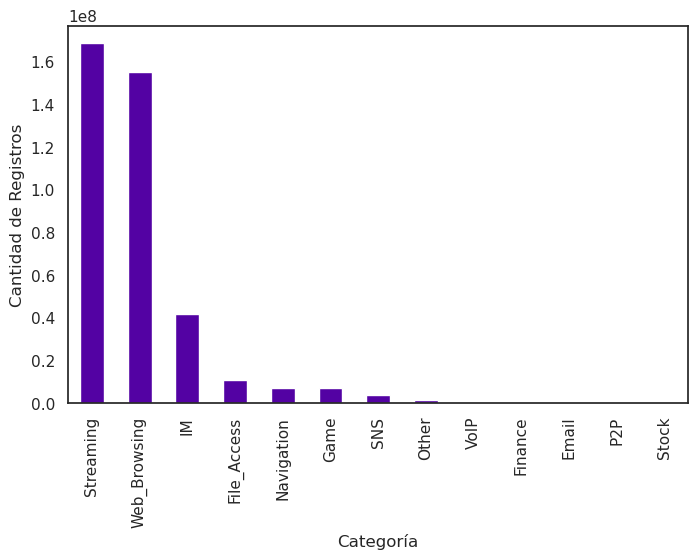

In [48]:
%%time
len(data.APP_NAME.unique().compute())

* El total de aplicaciones es 2676. Es decir, que el resto de las 2656 aplicaciones se reparten el 16.75% de los registros

In [ ]:
data.APPLICATION_TYPE_ID.value_counts(sort=True).compute().head(50).plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=90)
plt.savefig('results/dia_1_categorias.png', bbox_inches = 'tight')

### 3.1.1 Top 10 de apps por Comuna

Se evaluara el top 10 de aplicaciones mas utilizadas por comuna de la Gran Santiago

In [51]:
%%time
data_labor_hourly = data[data.DAY_CAT == 'laborable'].groupby(['DAY_NUMBER','HOUR', 'NOM_COMUNA','APP_NAME'])['USER_ID'].count().dropna().compute()
data_labor_hourly

CPU times: user 39 ms, sys: 6.6 ms, total: 45.6 ms
Wall time: 33.9 ms


In [148]:
%%time
data_labor_hourly = data_labor_hourly.groupby(['HOUR', 'NOM_COMUNA','APP_NAME']).mean()

HOUR NOM_COMUNA  APP_NAME    USER_ID
0          0  CERRILLOS     13CDN   5.000000
1          0  CERRILLOS      2GIS   2.000000
2          0  CERRILLOS      2mdn  30.600000
3          0  CERRILLOS       2o7   2.666667
4          0  CERRILLOS     77CDN   2.500000
...      ...        ...       ...        ...
538942    23      ÑUÑOA     Zynga  47.000000
538943    23      ÑUÑOA      eBay  52.400000
538944    23      ÑUÑOA     iFood   2.333333
538945    23      ÑUÑOA  iMessage  43.400000
538946    23      ÑUÑOA     ivoox   2.500000

[538947 rows x 4 columns]

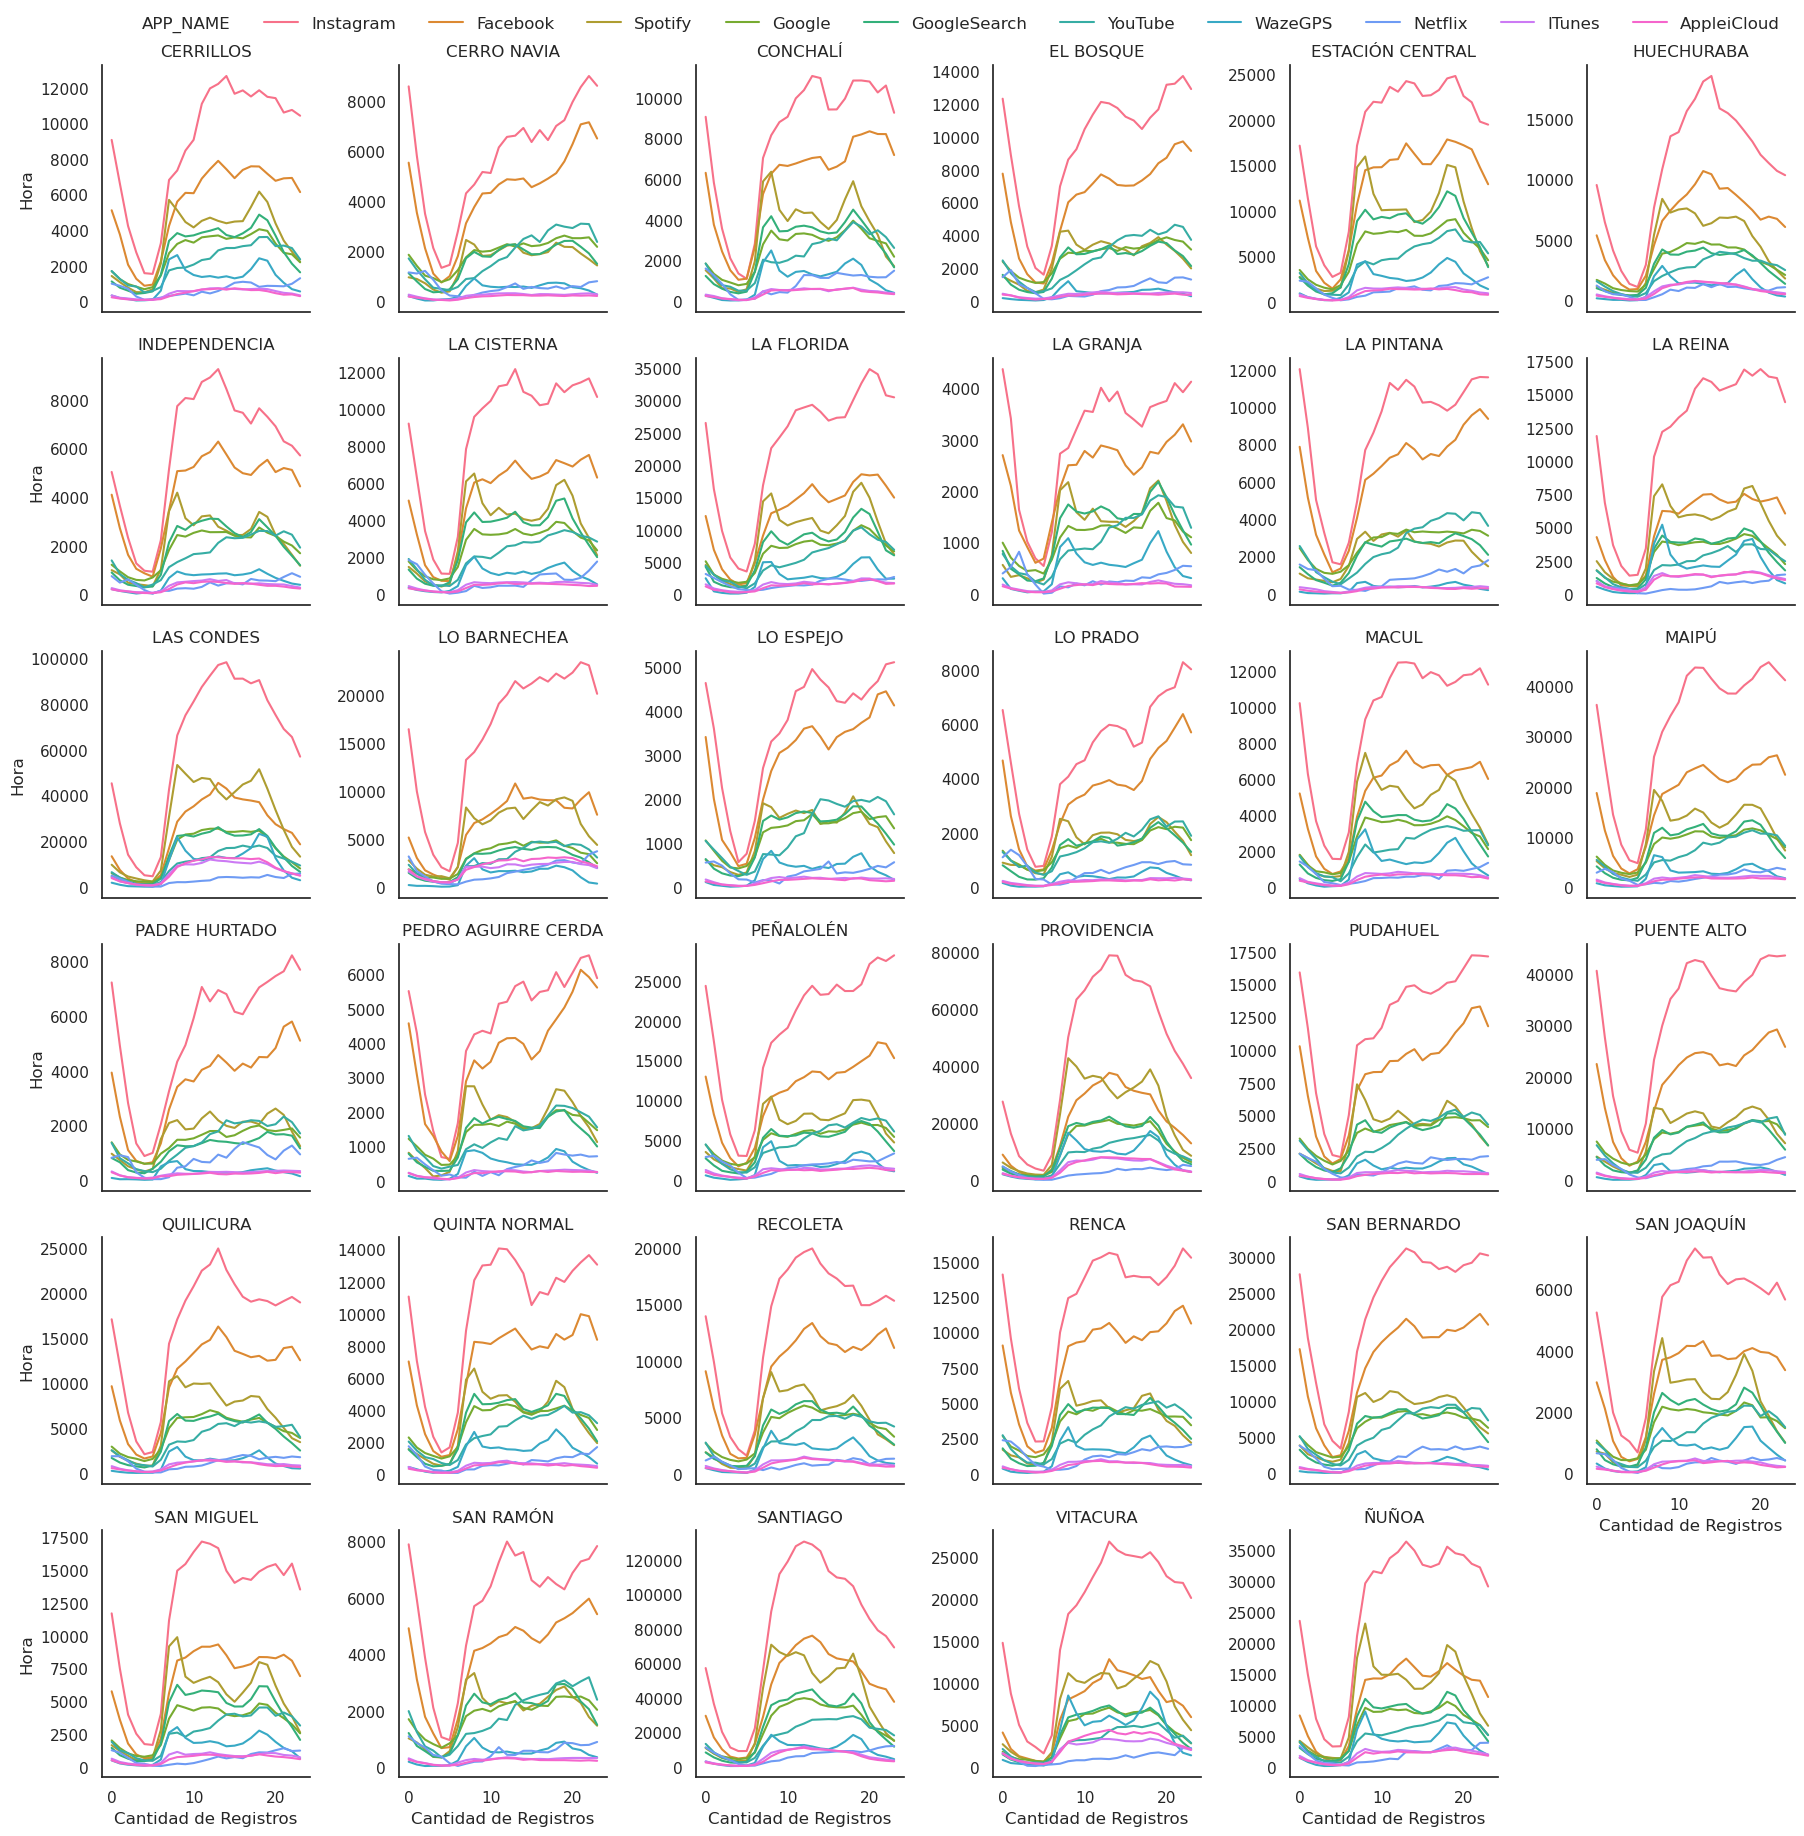

In [555]:
%%time
data_labor_hourly = data_labor_hourly.reset_index(drop=False)

In [ ]:
data_labor_hourly

In [59]:
plt.Figure(figsize=(10,10))
#sns.set(font_scale=0.90)

g = sns.FacetGrid(data = data_labor_hourly,
                  col = 'NOM_COMUNA',
                  col_wrap= 6,
                  sharey = False,
                  aspect= 1
                 )
g.map_dataframe(sns.lineplot, 
                x = 'HOUR',
                y = 'USER_ID',
                hue = 'APP_NAME',
                hue_order = data_lab.groupby('APP_NAME').mean().nlargest(10).index.tolist(),
               )

for ax, title in zip(g.axes.flat, data_labor_hourly.NOM_COMUNA.unique().tolist()):
    ax.set_title(title)

g.set_xlabels('Cantidad de Registros')
g.set_ylabels('Hora')
plt.legend(frameon=False, loc='center', ncol=11, bbox_to_anchor=(-1.7, 7.1), prop={'size': 12})
plt.savefig('results/day1/labor_top10_apps_comuna.png', format='png', dpi=150, bbox_inches = 'tight')
plt.show()

CPU times: user 42.2 s, sys: 8.59 s, total: 50.8 s
Wall time: 2min 16s


### Realizar grafico donde columnas son apps, y filas son comunas. (un grafico por app)

In [ ]:
%%time
data_nolabor_hourly = data[data.DAY_CAT == 'no_laborable'].groupby(['DAY_NUMBER','HOUR', 'NOM_COMUNA','APP_NAME'])['USER_ID'].count().dropna().compute()
data_nolabor_hourly = data_nolabor_hourly.groupby(['HOUR', 'NOM_COMUNA','APP_NAME']).mean()
data_nolabor_hourly = data_nolabor_hourly.reset_index(drop=False)


plt.Figure(figsize=(10,10))
#sns.set(font_scale=0.90)

g = sns.FacetGrid(data = data_nolabor_hourly,
                  col = 'NOM_COMUNA',
                  col_wrap= 6,
                  sharey = False,
                  aspect= 1
                 )

g.map_dataframe(sns.lineplot, 
      x = 'HOUR',
      y = 'USER_ID',
      hue = 'APP_NAME',
      hue_order = data_nolab.groupby('APP_NAME').mean().nlargest(10).index.tolist()
     )

for ax, title in zip(g.axes.flat, data_nolabor_hourly.NOM_COMUNA.unique().tolist()):
    ax.set_title(title)

g.set_xlabels('Cantidad de Registros')
g.set_ylabels('Hora')
plt.legend(frameon=False, loc='center', ncol=11, bbox_to_anchor=(-1.7, 7.1), prop={'size': 12})
plt.savefig('results/day1/nolabor_top10_apps_comuna.png', format='png', dpi=150, bbox_inches = 'tight')
plt.show()

In [61]:
#presupuesto por habitante comunas de la region metropolitana
#Fuente: https://www.latercera.com/nacional/noticia/presupuesto-habitante-comunas-tienen-diferencias-ocho-veces/840415/


ing_pcapita = {
    'NOM_COMUNA': ['CERRILLOS', 'CERRO NAVIA', 'CONCHALÍ', 'EL BOSQUE', 'ESTACIÓN CENTRAL', 'HUECHURABA', 'INDEPENDENCIA', 
                  'LA CISTERNA', 'LA FLORIDA', 'LA GRANJA', 'LA PINTANA', 'LA REINA', 'LAS CONDES', 'LO BARNECHEA', 'LO ESPEJO', 'LO PRADO', 
                  'MACUL', 'MAIPÚ', 'ÑUÑOA', 'PADRE HURTADO','PEDRO AGUIRRE CERDA', 'PEÑALOLÉN', 'PROVIDENCIA', 'PUDAHUEL', 'PUENTE ALTO', 
                  'QUILICURA', 'QUINTA NORMAL', 'RECOLETA', 'RENCA', 'SAN BERNARDO', 'SAN JOAQUÍN', 'SAN MIGUEL', 'SAN RAMÓN', 'SANTIAGO', 
                  'VITACURA'], 
    'ING_PCAPITA': [267612, 143328, 177220, 160902, 206589, 365295, 198671, 167445, 179169, 157419, 163883, 369326, 1129510, 
                    877036, 169550, 175806, 188508, 228742, 266354, 156492,146164, 233667, 880085, 287085, 150297, 219848, 
                    184447, 224703, 177062, 173002, 215285, 207525, 184595, 403920, 1136044]
}


ing_pcapita = pd.DataFrame(ing_pcapita)
ing_pcapita.set_index(['NOM_COMUNA']).sort_values(by='ING_PCAPITA',ascending=True).plot(kind='barh', figsize=(5,10))
plt.xticks(rotation=90)
plt.ylabel('Comuna')
plt.xlabel('Ingreso promedio per capita')
#plt.ticklabel_format(style='plain')
plt.savefig('results/ingreso_pcapita.png', bbox_inches = 'tight')
plt.show()

* De acuerdo a estudio de La Tercera, las comunas con mayor ingreso per capita son:
    * Vitacura
    * Las Condes
    * Providencia 
    * Lo Barnechea

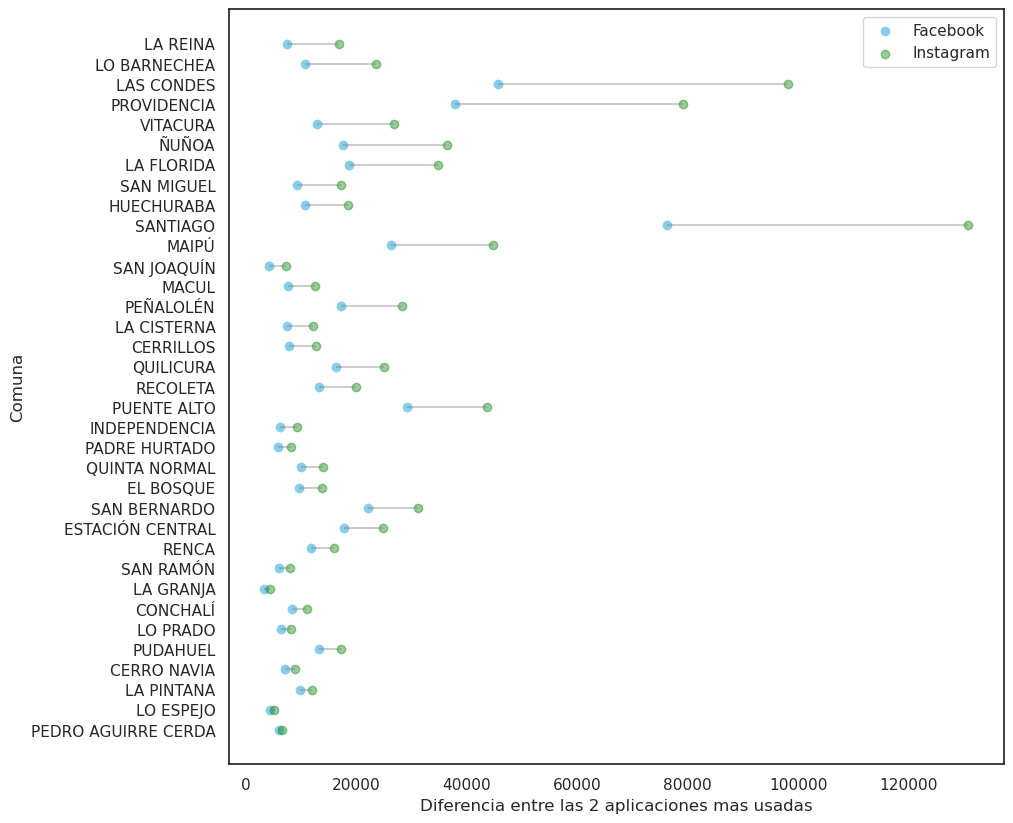

In [76]:
insta_max_val = data_labor_hourly[data_labor_hourly.APP_NAME == 'Instagram'][['NOM_COMUNA', 'APP_NAME', 'USER_ID']].groupby(['NOM_COMUNA', 'APP_NAME']).max().reset_index(drop=False)
face_max_val = data_labor_hourly[data_labor_hourly.APP_NAME == 'Facebook'][['NOM_COMUNA', 'APP_NAME', 'USER_ID']].groupby(['NOM_COMUNA', 'APP_NAME']).max().reset_index(drop=False)
insta_face_max_vals = insta_max_val.merge(face_max_val, on='NOM_COMUNA', how='left')
insta_face_max_vals['diff'] = insta_face_max_vals.USER_ID_x - insta_face_max_vals.USER_ID_y
insta_face_max_vals['diff_perc'] = round(insta_face_max_vals['diff']/insta_face_max_vals.USER_ID_y *100, 2)
insta_face_max_vals.sort_values(by=['diff_perc'], ascending=False, inplace=True)

In [ ]:
insta_face_max_vals[['NOM_COMUNA', 'APP_NAME_x', 'APP_NAME_y', 'diff_perc']]

In [77]:
plt.figure(figsize=(10,10))
 
# Reorder it following the values of the first value:
ordered_df = insta_face_max_vals.sort_values(by='diff_perc', ascending=True)
my_range=range(1,len(insta_face_max_vals.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
ax = plt.hlines(y=my_range, xmin=ordered_df['USER_ID_y'], xmax=ordered_df['USER_ID_x'], color='grey', alpha=0.4)
plt.scatter(ordered_df['USER_ID_y'], my_range, color='skyblue', alpha=1, label='Facebook')
plt.scatter(ordered_df['USER_ID_x'], my_range, color='green', alpha=0.4 , label='Instagram')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['NOM_COMUNA'])
plt.xlabel('Diferencia entre las 2 aplicaciones mas usadas')
plt.ylabel('Comuna')
plt.savefig('results/diff_min_max_apps.png', bbox_inches = 'tight')
plt.show()


35

Lo anterior son las top10 apps mas usadas por comuna de la Gran Santiago.
* Instagram es la appa mas usada en todas las comunas, en la mayoria de los casos duplica a la segunda app
* Las comunas mas activas desde el punto de vista de consultas son Santiago Centro, Providencia y Las condes
* En las comunas con un mayor ingreso per capita `Vitacura, Las Condes, Providencia, Lo Barnechea` el uso de la consulta mas realizada supera en mas del 100% a la segunda consulta.

In [109]:
len(comunas)

NOM_COMUNA
SANTIAGO               8507505.2
LAS CONDES             6104168.0
PROVIDENCIA            4658884.0
MAIPÚ                  3011384.8
PUENTE ALTO            2992483.8
ÑUÑOA                  2490911.6
SAN BERNARDO           2331389.4
LA FLORIDA             2326499.6
ESTACIÓN CENTRAL       1984058.2
PEÑALOLÉN              1896869.0
VITACURA               1747455.6
QUILICURA              1649983.6
LO BARNECHEA           1443913.0
RECOLETA               1380679.4
PUDAHUEL               1262568.6
RENCA                  1239427.4
SAN MIGUEL             1189258.4
LA REINA               1132609.2
HUECHURABA             1096051.8
QUINTA NORMAL          1058939.8
MACUL                   968365.2
CERRILLOS               937955.2
EL BOSQUE               922775.8
LA PINTANA              909758.0
LA CISTERNA             905286.6
CONCHALÍ                893244.0
INDEPENDENCIA           633974.8
CERRO NAVIA             625627.4
SAN RAMÓN               614010.8
SAN JOAQUÍN             542861.8

In [110]:
%%time
#regs_comuna_day1=day1.groupby('NOM_COMUNA')['USER_ID'].size().compute().sort_values(ascending=False)
#regs_comuna_day

regs_comuna_labor = data[data.DAY_CAT == 'laborable'].groupby(['DAY_NUMBER','NOM_COMUNA'])['USER_ID'].size().compute().sort_values(ascending=False)

In [111]:
regs_comuna_labor = regs_comuna_labor.groupby(level='NOM_COMUNA').mean().sort_values(ascending=False)
regs_comuna_labor.plot(kind='bar', figsize=(10,7))
print(regs_comuna_labor)

In [112]:
cant_reg_comuna_labor = round(data_labor_hourly.groupby(['HOUR', 'NOM_COMUNA'])['USER_ID'].sum().unstack(-2).reset_index(drop=False), 2)

Cantidad de antenas por comuna


NOM_COMUNA  CELL_ID
0             CERRILLOS      209
1           CERRO NAVIA      146
2              CONCHALÍ      223
3             EL BOSQUE      166
4      ESTACIÓN CENTRAL      439
5            HUECHURABA      249
6         INDEPENDENCIA      165
7           LA CISTERNA      190
8            LA FLORIDA      555
9             LA GRANJA       96
10           LA PINTANA      207
11             LA REINA      392
12           LAS CONDES     2013
13         LO BARNECHEA      366
14            LO ESPEJO      107
15             LO PRADO      158
16                MACUL      315
17                MAIPÚ      732
18        PADRE HURTADO      109
19  PEDRO AGUIRRE CERDA       99
20            PEÑALOLÉN      437
21          PROVIDENCIA     1398
22             PUDAHUEL      265
23          PUENTE ALTO      608
24            QUILICURA      366
25        QUINTA NORMAL      204
26             RECOLETA      334
27                RENCA      266
28         SAN BERNARDO      451
29          SAN JOAQUÍN      130
30           SAN MIGUEL      261
31            SAN RAMÓN      119
32             SANTIAGO     2433
33             VITACURA      447
34                ÑUÑOA      604

In [113]:
cant_antena_comuna = antenas_rm.groupby('NOM_COMUNA')['CELL_ID'].count().reset_index(drop=False)

In [114]:
print('Cantidad de antenas por comuna')
cant_antena_comuna

NOM_COMUNA         0         1        2        3        4        5  \
0  CERRILLOS  32613.53  25695.53  17466.4  12240.2  8742.37  9224.35   

          6         7         8  ...        15        16        17        18  \
0  18665.63  37438.58  43938.48  ...  52792.52  54154.18  55567.45  58849.12   

         19        20        21        22        23  CELL_ID  
0  55860.33  49753.88  45028.38  43203.38  39505.07      209  

[1 rows x 26 columns]

In [115]:
cant_reg_comuna_labor = cant_reg_comuna_labor.merge(cant_antena_comuna, on='NOM_COMUNA', how='left')

NOM_COMUNA          0          1         2         3         4  \
0             CERRILLOS   32613.53   25695.53  17466.40  12240.20   8742.37   
1           CERRO NAVIA   32060.62   23716.87  16406.28  11797.40   8614.68   
2              CONCHALÍ   37179.37   25205.88  16365.53  11996.53   8482.48   
3             EL BOSQUE   45423.75   33391.83  22005.28  15215.67  10996.05   
4      ESTACIÓN CENTRAL   65097.83   45878.88  29424.47  21783.97  17664.07   
5            HUECHURABA   32803.42   24163.58  16185.67  12370.32   8759.70   
6         INDEPENDENCIA   22004.00   15565.53  11347.13   8473.43   6821.77   
7           LA CISTERNA   34915.53   25016.00  16293.18  11397.55   8844.88   
8            LA FLORIDA   94096.77   58549.65  40597.17  28629.57  21216.68   
9             LA GRANJA   17770.23   13654.58   8867.08   6285.18   4956.57   
10           LA PINTANA   45017.55   33958.38  23490.65  17144.78  11403.98   
11             LA REINA   39198.05   25053.17  15514.82  10944.35   8349.22   
12           LAS CONDES  145111.58   94036.40  58543.68  42043.27  31720.95   
13         LO BARNECHEA   51612.22   33094.60  21888.10  15427.73  11932.20   
14            LO ESPEJO   19234.22   15100.88  10251.27   7257.50   5148.08   
15             LO PRADO   25230.10   18941.15  13792.30   9840.92   6676.43   
16                MACUL   36163.20   25717.55  16570.02  11431.17   9344.85   
17                MAIPÚ  117733.45   83978.13  56300.22  37107.70  29172.10   
18        PADRE HURTADO   24963.90   17483.40  12684.50   8547.32   6348.78   
19  PEDRO AGUIRRE CERDA   23691.77   18390.23  12328.12   8958.10   6190.60   
20            PEÑALOLÉN   84603.08   62599.93  41484.52  29265.98  20816.25   
21          PROVIDENCIA   97772.45   63285.93  41402.73  29252.38  22320.77   
22             PUDAHUEL   57841.90   43784.92  28606.97  18843.33  13427.87   
23             PUDAHUEL   57841.90   43784.92  28606.97  18843.33  13427.87   
24          PUENTE ALTO  133633.60   95868.12  63223.03  42768.13  31167.03   
25            QUILICURA   58069.40   42969.47  28637.98  19256.28  14895.10   
26        QUINTA NORMAL   41036.47   28888.92  19170.48  12650.07   9045.35   
27             RECOLETA   49942.65   35634.60  24098.83  16471.12  12401.08   
28                RENCA   51615.65   37499.10  26716.27  17929.73  14289.33   
29         SAN BERNARDO   97515.55   70001.62  49597.07  32561.18  24462.62   
30          SAN JOAQUÍN   20585.50   15612.83  10090.32   6621.53   5588.93   
31           SAN MIGUEL   40063.72   27357.68  18386.55  12640.42   9740.93   
32            SAN RAMÓN   30286.97   22475.07  15225.58  10808.73   7374.63   
33             SANTIAGO  222472.60  150771.03  99043.45  71104.70  56732.53   
34             VITACURA   46795.65   27542.98  18582.27  14020.85  11340.33   
35                ÑUÑOA   80474.20   52933.65  33507.97  22383.75  18853.15   

           5          6          7          8  ...         16         17  \
0    9224.35   18665.63   37438.58   43938.48  ...   54154.18   55567.45   
1    9331.70   13962.20   21910.72   25682.42  ...   31926.17   31726.08   
2    8764.28   17589.93   40039.63   47122.25  ...   47323.57   50981.50   
3   10378.25   17687.98   31785.78   39230.80  ...   46715.27   48040.85   
4   20971.12   42187.25   89479.28  106412.00  ...  105747.53  115228.18   
5    7935.10   16099.28   38767.40   56406.62  ...   68615.42   66422.08   
6    7025.60   12083.83   25955.25   34850.47  ...   33742.72   33163.28   
7    9246.87   19218.53   39741.93   47829.88  ...   47000.97   49399.58   
8   20916.88   42424.50   88232.08  109003.93  ...  118605.20  124906.70   
9    4325.37    8026.58   15308.42   17475.30  ...   19640.58   19452.52   
10  12006.10   17022.58   26886.23   37463.38  ...   47738.98   47138.52   
11   8311.83   16744.92   49782.75   61831.83  ...   64963.32   65509.45   
12  30183.75   63094.98  200453.12  331203.47  ...  388406.50  384465.72   
13  11041.17   21183.72  

In [116]:
cant_reg_comuna_labor.head(1)

In [117]:
cant_reg_comuna_labor = cant_reg_comuna_labor.merge(areas, on='NOM_COMUNA', how='left')
cant_reg_comuna_labor

In [118]:
from sklearn.preprocessing import normalize

In [344]:
#Normalizacion de registros
#Min Max normalization
def normalizer(df):
    max_value = df.max()
    min_value = df.min()
    result = (df - min_value) / (max_value - min_value)
    return result

CPU times: user 6.03 s, sys: 1.4 s, total: 7.44 s
Wall time: 5.72 s


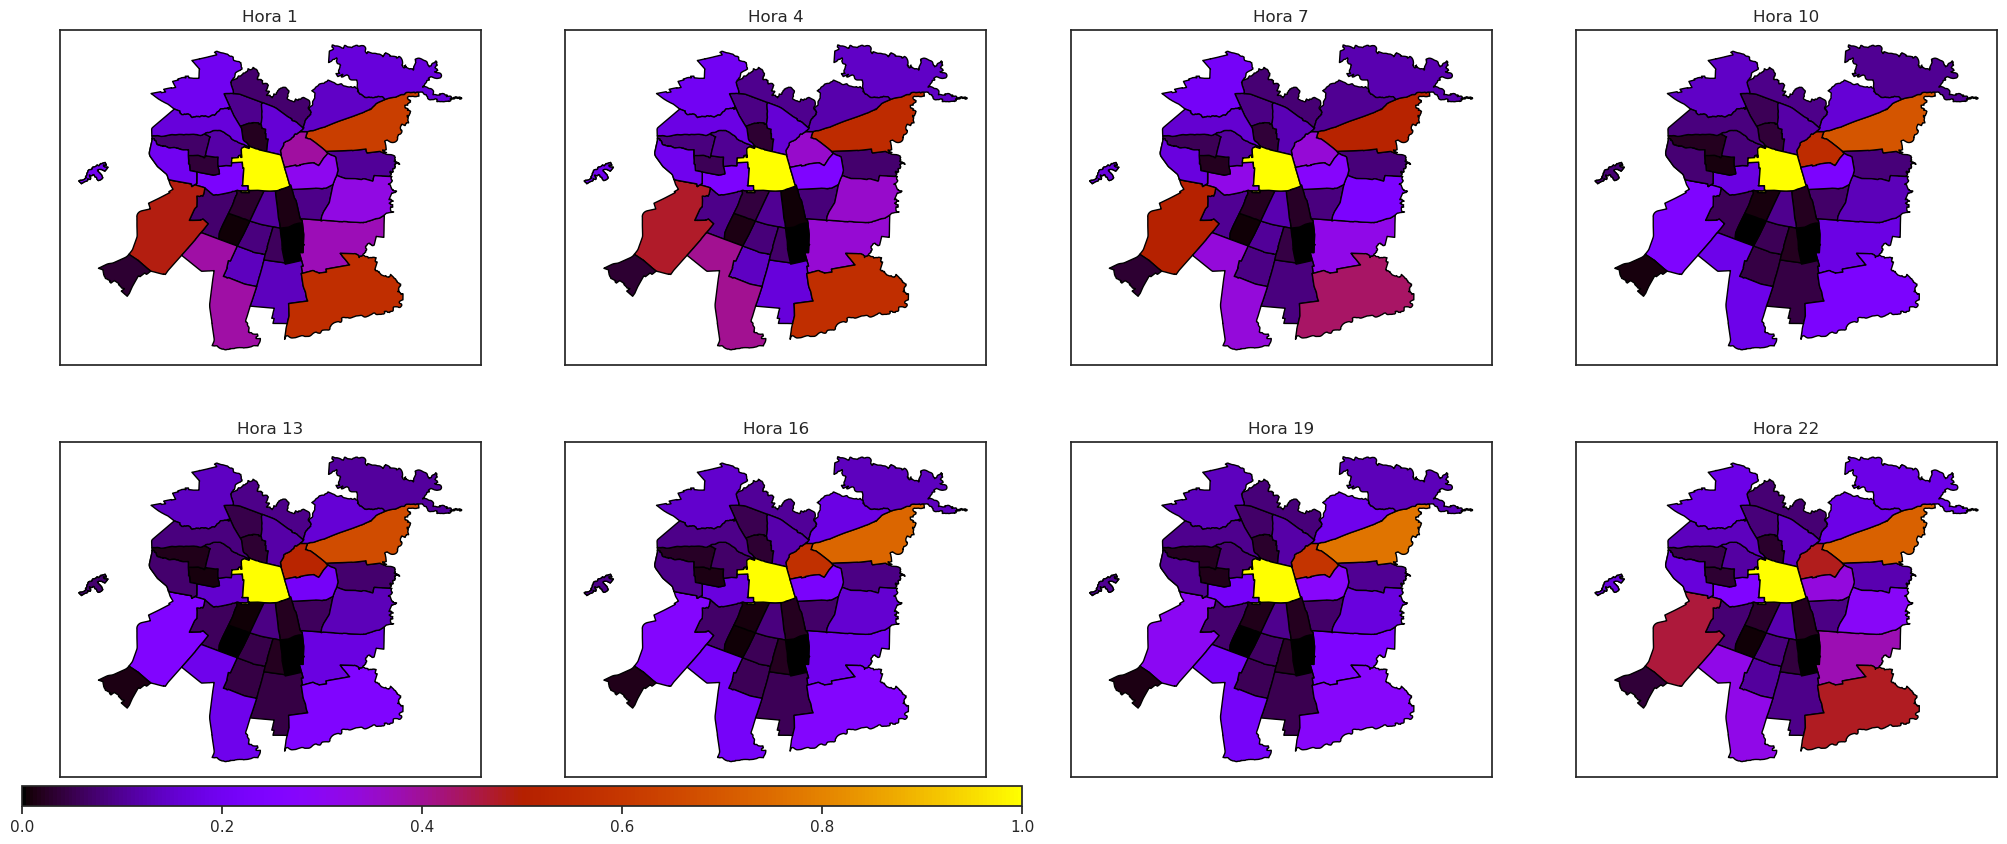

In [345]:
#cant_reg_comuna_day1['densidad'] = normalize(cant_reg_comuna_day1['CELL_ID'])
#cant_reg_comuna_day1

In [ ]:
def map_reg_hourly(cant_reg_comuna, map_polygon):
    fig = plt.figure(figsize=(25, 10))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    #fig.suptitle('Cantidad de Registros por Comuna (NORMALIZADO)')
    
    for x, i in enumerate(range(0,24, 3)):
        #ax = fig.add_subplot(6, 4, x+1)
        ax = fig.add_subplot(2, 4, x+1) #un mapa  cada 4 hora
        
        vmin, vmax = 0, 1
        
        #normalizacion
        #descomentar en caso de usar min-max normalization
        cant_reg_comuna['REG_NORMALIZADO'] = normalizer(cant_reg_comuna[i])
        #cant_reg_comuna['REG_NORMALIZADO'] = normalize(cant_reg_comuna[i], norm='max')
        
        #descomentar en caso de usar normalizacion por cantidad de antenas
        #cant_reg_comuna['REG_NORMALIZADO'] = cant_reg_comuna[i] / (cant_reg_comuna['CELL_ID'])
        #cant_reg_comuna['REG_NORMALIZADO'] = normalize(cant_reg_comuna['REG_NORMALIZADO'])
        
        #descomentar en caso de usar factor de cantidad de antenas normalizadas
        #cant_reg_comuna['REG_NORMALIZADO'] = cant_reg_comuna[i] * (cant_reg_comuna['CELL_ID_nor'])
        
        #descomentar para min-max normalization
        for_ploting = cant_reg_comuna[['NOM_COMUNA', 'REG_NORMALIZADO']].merge(map_polygon[['NOM_COMUNA', 'SHAPE_Leng', 'SHAPE_Area', 'geometry']], on='NOM_COMUNA', how='left')
        
        for_ploting = gpd.GeoDataFrame(for_ploting, geometry='geometry', crs=mapa_zonas.crs)
        for_ploting.plot(column='REG_NORMALIZADO', #cambiar REG_NORMALIZADO si min-man o densidad si es densidad
                         legend=False, 
                         #legend_kwds={'label': "Registros Normalizados", 'orientation': "horizontal"},
                         #scheme='equal_interval',
                         #scheme='fisherjenks',
                         #cmap = 'Blues',
                         cmap = 'gnuplot',
                         edgecolor='k',
                         vmin = vmin,
                         vmax = vmax, 
                         ax=ax)
        
        
        #m = plt.cm.ScalarMappable(cmap = 'Blues', norm = plt.Normalize(vmin=vmin, vmax=vmax))
        #sm._A = []
        #cbar = fig.colorbar(sm)
        
        #ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik, crs=mapa_zonas.crs)
        plt.title('Hora ' + str(i+1))
        #ax.set_axis_off()
        plt.xticks([])
        plt.yticks([])

    a = np.array([[vmin,vmax]])
    fig.add_subplot()
    img = pl.imshow(a, cmap="gnuplot")
    pl.gca().set_visible(False)
    cax = pl.axes([0.11, 0.1,.4,.02])
    pl.colorbar(orientation="horizontal", cax=cax)

In [346]:
%%time
#cantidad de registros por comuna (Normalizado por cantidad de registros)
map_reg_hourly(cant_reg_comuna_labor, gransantiago)
plt.savefig('results/day1/cant_registros_normalizado_labor.png', bbox_`inches = 'tight')

## Elaborar grafico de lineas para cantidad de registros por horas por comunas. (cada linea es una comuna)

In [258]:
cant_reg_comuna_nolabor = round(data_nolabor_hourly.groupby(['HOUR', 'NOM_COMUNA'])['USER_ID'].sum().unstack(-2).reset_index(drop=False), 2)
cant_reg_comuna_nolabor = cant_reg_comuna_nolabor.merge(cant_antena_comuna, on='NOM_COMUNA', how='left')
cant_reg_comuna_nolabor = cant_reg_comuna_nolabor.merge(areas, on='NOM_COMUNA', how='left')
map_reg_hourly(cant_reg_comuna_nolabor, gransantiago)
plt.savefig('results/day1/cant_registros_normalizado_nolabor.png', bbox_inches = 'tight')

115717

* Los graficos anteriores muestran como varia la cantidad (normalizada) de registros por comuna. 
*El primero son dia laborables, y el segundo son fines de semana. 

CPU times: user 58.6 s, sys: 11.8 s, total: 1min 10s
Wall time: 3min 39s


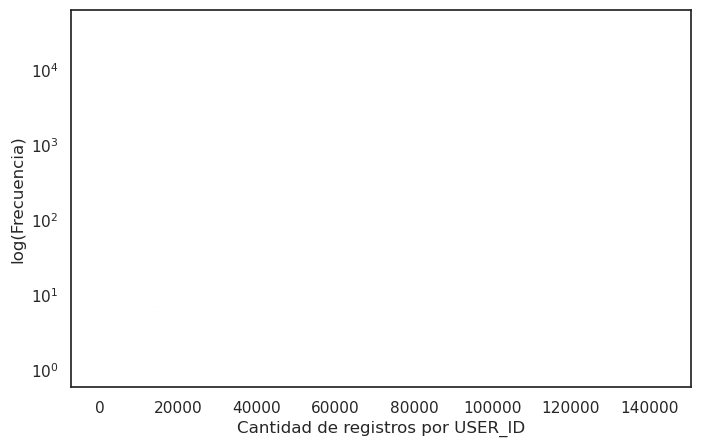

In [172]:
import gc
gc.collect()

### 3.1.2 Explorando el comportamiento de usuarios

Primero de forma manual para ver algun patron, lo hare con los primeros 5 usuarios

In [128]:
%%time
plt.hist(data_labor_subset.USER_ID.dropna().value_counts(sort=True).compute(), bins='auto')
plt.yscale('log')
plt.gca().set(ylabel='log(Frecuencia)', xlabel='Cantidad de registros por USER_ID')
plt.savefig('results/day1/cant_reg_porusuario_day1.png', bbox_inches = 'tight')

CPU times: user 19.4 s, sys: 4.11 s, total: 23.5 s
Wall time: 1min 41s


La grafica anterior muestra la frecuencia por cantidad de registros, es decir a la izquierda las menos interacciones y a la derecha las mas interacciones. Como se ve en la grafica han habido mas usuarios con pocas interacciones (uso de apps) que usuarios con mas interacciones. 

In [130]:
%%time
users = data.USER_ID.dropna().unique().compute().tolist()

### USUARIO 0 ###
####### COMUNUNAS POR LA QUE TRANSITA #######


[]


 ####### CELDAS DE TELEFONO POR LAS QUE PASA #######


[]


 ####### APLICACIONES QUE USA #######


Series([], Name: APP_NAME, dtype: int64)




### USUARIO 1 ###
####### COMUNUNAS POR LA QUE TRANSITA #######


['LO PRADO',
 'SANTIAGO',
 'LA FLORIDA',
 'LA GRANJA',
 'SAN MIGUEL',
 'SAN RAMÓN',
 'LA CISTERNA',
 'ÑUÑOA',
 'MACUL',
 'EL BOSQUE',
 'SAN JOAQUÍN']


 ####### CELDAS DE TELEFONO POR LAS QUE PASA #######


[1057825.0,
 1626172.0,
 1072933.0,
 1319456.0,
 1464864.0,
 1078560.0,
 1275680.0,
 1212709.0,
 60425.0,
 1286175.0,
 1256225.0,
 1426720.0,
 60451.0,
 1072927.0,
 1212711.0,
 51484.0,
 56466.0,
 60413.0,
 1631519.0,
 1057815.0,
 1212703.0,
 56465.0,
 12673.0,
 1212704.0,
 1426726.0,
 1366048.0,
 1256224.0,
 1626174.0,
 1253159.0,
 1226273.0,
 1212705.0,
 60424.0,
 1319461.0,
 51494.0,
 1249057.0,
 1280039.0,
 1319457.0,
 1319455.0,
 1102374.0,
 1087520.0,
 60415.0,
 1519647.0,
 1078561.0,
 1048342.0,
 1048352.0,
 1522719.0,
 1087521.0,
 1626173.0,
 60378.0,
 1315093.0,
 1626155.0,
 1426719.0,
 1417759.0,
 1048353.0,
 60448.0,
 1366047.0,
 1219366.0,
 44895.0,
 1319462.0,
 4652.0]


 ####### APLICACIONES QUE USA #######


ClashRoyale     177
Spotify         158
Google           39
Instagram        32
Facebook         26
GoogleSearch     19
DoubleClick       9
YouTube           6
Adjust            6
AmazonS3          4
Name: APP_NAME, dtype: int64




### USUARIO 2 ###
####### COMUNUNAS POR LA QUE TRANSITA #######


['PROVIDENCIA',
 'SANTIAGO',
 'RECOLETA',
 'LA FLORIDA',
 'LA GRANJA',
 'LO PRADO',
 'SAN RAMÓN',
 'ÑUÑOA',
 'CONCHALÍ',
 'LA CISTERNA',
 'EL BOSQUE']


 ####### CELDAS DE TELEFONO POR LAS QUE PASA #######


[1133601.0,
 1241375.0,
 14327.0,
 12726.0,
 1318687.0,
 1212709.0,
 1078560.0,
 12673.0,
 1426720.0,
 1286175.0,
 1072933.0,
 1212704.0,
 1426726.0,
 1072927.0,
 1275680.0,
 1366048.0,
 1256224.0,
 49509.0,
 1318677.0,
 1547040.0,
 1547041.0,
 32950.0,
 1057825.0,
 1048352.0,
 1256225.0,
 60378.0,
 1315093.0,
 1319457.0,
 1626155.0,
 1378591.0]


 ####### APLICACIONES QUE USA #######


Spotify         35
GoogleSearch    26
ClashRoyale     12
Google           5
Instagram        4
TaoBao           3
Adjust           2
AliBaBa          2
YouTube          2
Newrelic         1
Name: APP_NAME, dtype: int64

In [ ]:
users[0:5]

In [131]:
for i, x in enumerate(users[5:8]):
    
    tempo_data = data[(data.USER_ID == x) & (data.DAY_NUMBER == 'day_3')].compute()
                                             
    print('### USUARIO ' + str(i) + ' ###')
    print('####### COMUNUNAS POR LA QUE TRANSITA #######')
    display(tempo_data.NOM_COMUNA.unique().tolist())
    print('\n', '####### CELDAS DE TELEFONO POR LAS QUE PASA #######')
    display(tempo_data.CELL_ID.unique().tolist())
    print('\n', '####### APLICACIONES QUE USA #######')
    display(tempo_data.APP_NAME.value_counts().head(10))
    print('\n\n')

CPU times: user 1min 3s, sys: 14.7 s, total: 1min 18s
Wall time: 4min 28s


Dado que no todos los usuarios viajan lugares diferentes, realizare un subset con los usuarios que han cambiado de `CELL_ID`. Bajo el supuesto de que si ha cambiado de `CELL_ID` es porque se ha desplazado por cualquier medio.

In [133]:
%%time
users_cells = pd.DataFrame(data.groupby(['USER_ID','CELL_ID'])['CELL_ID'].size().compute())
users_cells = pd.DataFrame(users_cells.rename(columns={'CELL_ID':'count'}).reset_index(drop=False).groupby('USER_ID')['CELL_ID'].size())
users_cells.reset_index(drop=False, inplace=True)
users_cells = users_cells[users_cells.CELL_ID >= 2].USER_ID.unique().tolist()
# Donde users_cells son todos los usuarios que han estado en mas de una CELL_ID en todo el periodo

29081

In [ ]:
len(users_cells)

In [ ]:
len(data.USER_ID.dropna().unique().compute()) - len(users_cells)

* Hay `29081` usuarios que no cambiaron de `CELL_ID` en el dia

In [ ]:
#users_cells = pd.DataFrame(users_cells, columns=['USER_ID'])

In [136]:
%%time
len(data) - len(data.loc[data['USER_ID'].isin(users_cells)])

* Es decir, quedarian 3.730.106 registros fuera, debido a corresponden a usuarios que nocambiaron de ubicacion durante el dia. 

In [138]:
data_labor_subset = data.loc[data['USER_ID'].isin(users_cells)]

CPU times: user 1min 20s, sys: 14.8 s, total: 1min 35s
Wall time: 6min 8s


In [139]:
len(data_labor_subset)

In [140]:
%%time
data_labor_hourly_usr = data_labor_subset.groupby([data_labor_subset.EVENT_TM.dt.hour, 'USER_ID', 'NOM_COMUNA'])['CELL_ID'].count().compute().reset_index(drop=False)

EVENT_TM           NOM_COMUNA      0      1      2      3      4      5  \
0                   CERRILLOS   6571   4948   3987   3447   3294   3765   
1                 CERRO NAVIA   5771   4590   3823   3406   3303   3608   
2                    CONCHALÍ   5695   4569   3803   3337   3104   3378   
3                   EL BOSQUE   7163   5668   4926   4350   3985   4330   
4            ESTACIÓN CENTRAL  11011   8349   6919   6166   5891   7435   
5                  HUECHURABA   5617   4636   3912   3466   2980   3098   
6               INDEPENDENCIA   4299   3481   2873   2503   2265   2385   
7                 LA CISTERNA   7248   5412   4460   3871   3489   3850   
8                  LA FLORIDA  15949  11420   9535   8480   7640   7891   
9                   LA GRANJA   4997   3265   2652   2202   1980   2172   
10                 LA PINTANA   7329   5719   4764   4293   3912   4250   
11                   LA REINA   8161   6428   5348   4665   4029   3987   
12                 LAS CONDES  22995  19203  16276  14310  12825  12630   
13               LO BARNECHEA   7329   6318   5427   4629   4174   4054   
14                  LO ESPEJO   4347   3117   2587   2266   2120   2386   
15                   LO PRADO   4763   3832   3148   2796   2623   2783   
16                      MACUL   7254   5337   4317   3744   3420   3619   
17                      MAIPÚ  17722  14995  12988  11718  10842  11226   
18              PADRE HURTADO   3569   2864   2421   2207   2023   2175   
19        PEDRO AGUIRRE CERDA   4296   3221   2617   2261   2111   2313   
20                  PEÑALOLÉN  12114   9766   8349   7500   6756   6830   
21                PROVIDENCIA  17306  13764  11332   9680   8683   8703   
22                   PUDAHUEL   9362   7650   6473   5908   5547   6095   
23                PUENTE ALTO  17490  14665  12807  11601  10604  10913   
24                  QUILICURA   7666   6697   5754   5224   4884   5161   
25              QUINTA NORMAL   7457   5928   4924   4346   4120   4531   
26                   RECOLETA   9810   8540   7298   6543   5809   5411   
27                      RENCA   8222   6465   5434   4963   4843   5267   
28               SAN BERNARDO  12193  10165   8722   7901   7287   8010   
29                SAN JOAQUÍN   4523   3312   2637   2240   2043   2156   
30                 SAN MIGUEL   8163   6562   5305   4647   4177   4384   
31                  SAN RAMÓN   6238   4691   3815   3351   3110   3383   
32                   SANTIAGO  29652  24409  20837  18715  17389  18149   
33                   VITACURA   9894   7979   6506   5484   4755   4439   
34                      ÑUÑOA  14835  11538   9568   8174   7330   7099   

EVENT_TM      6      7      8  ...     14     15     16     17     18     19  \
0          6813  11533  13253  ...  16569  16704  17300  18559  19852  19194   
1          4887   7502   8067  ...   9647   9321   9665  10302  10787  10602   
2          6025  11327  13139  ...  14843  14529  15223  17007  17872  16150   
3          6213   9204  10555  ...  11997  11837  12033  12887  13640  13793   
4         13186  22183  26088  ...  30714  30925  31885  33633  35628  33447   
5          5019   9615  12002  ...  15435  15560  15898  16689  16824  15278   
6          3844   6932   8920  ...  10831  10484  10525  11284  11757  10789   
7          6687  11477  13507  ...  15232  15095  15443  16451  17912  17715   
8         12240  19466  22726  ...  28395  28369  29663  31981  34543  35214   
9          4233   7607   8851  ...   9521   9446   9999  10790  12300  12625   
10         5754   8334   9542  ...  11461  11294  11618  12068  12792  13078   
11         5910  11722  14703  ...  17914  17894  18581  19784  21114  20840   
12        17229  32449  44850  ...  62244  60982  61487  61951  61035  55581   
13         5171   8576  10077  ...  14090  13943  14401  14506  14230  13211   
14         4156   7180   7987  ...   8817   8734   9107   9819  10759  10425   
15         4305   7

In [141]:
data_labor_hourly_usr = data_labor_hourly_usr.groupby(['EVENT_TM', 'NOM_COMUNA'])['USER_ID'].count().unstack(0).reset_index(drop=False)

18149

18231

In [347]:
data_labor_hourly_usr

In [348]:
## chequeando datos
display(len(data_labor_subset[(data_labor_subset.NOM_COMUNA == 'SANTIAGO') & (data_labor_subset.EVENT_TM.dt.hour == 5)].USER_ID.unique().compute()))
display(len(data[(data.NOM_COMUNA == 'SANTIAGO') & (data.EVENT_TM.dt.hour == 5)].USER_ID.unique().compute()))

In [ ]:
def map_usr_hourly(cant_usr_comuna, map_polygon, vmin=450, vmax=20000):
    fig = plt.figure(figsize=(25, 10))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    #fig.suptitle('Cantidad de Registros por Comuna (NORMALIZADO)')
    
    for x, i in enumerate(range(0,24, 3)):
        #ax = fig.add_subplot(6, 4, x+1) #un mapa  por hora
        ax = fig.add_subplot(2, 4, x+1) #un mapa  cada 4 hora
        
        vmin, vmax = vmin, vmax
        
#        cant_usr_comuna['REG_NORMALIZADO'] = normalize(cant_usr_comuna[i])
        for_ploting = cant_usr_comuna[['NOM_COMUNA', i]].merge(map_polygon[['NOM_COMUNA', 'SHAPE_Leng', 'SHAPE_Area', 'geometry']], on='NOM_COMUNA', how='left')
        for_ploting = gpd.GeoDataFrame(for_ploting, geometry='geometry', crs=mapa_zonas.crs)
        for_ploting.plot(column=i, 
                         legend=False, 
                         #legend_kwds={'label': "Numero de Usuarios por Hora", 'orientation': "horizontal"},
                         #legend_kwds={'label': "Registros Normalizados (0 a 1)", 'orientation': "horizontal"},
                         #scheme='equal_interval',
#                        legend_kwds={'inteval': 10},
                         #scheme='FisherJenks',
                         cmap = 'gnuplot',
                         edgecolor='k',
                         vmin = vmin,
                         vmax = vmax,
                         ax=ax)
        #ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik, crs=mapa_zonas.crs)
        plt.title('Hora ' + str(i+1))
        #ax.set_axis_off()
        plt.xticks([])
        plt.yticks([])
        
    a = np.array([[vmin,vmax]])
    fig.add_subplot()
    img = pl.imshow(a, cmap="gnuplot")
    pl.gca().set_visible(False)
    cax = pl.axes([0.11, 0.1,.4,.02])
    pl.colorbar(orientation="horizontal", cax=cax)


In [ ]:
map_usr_hourly(data_labor_hourly_usr, gransantiago, 450, 101000)
plt.savefig('results/day1/cant_usr_day1.png', bbox_inches = 'tight')

* El grafico anterior muestra como varia con el tiempo la cantidad de usuarios 

### 3.4 NMF
* Determinar correlacion entre comunas y aplicaciones 

In [449]:
fig4 = data.groupby(['DAY_CAT', 'DAY_NUMBER', 'NOM_COMUNA', 'APP_NAME'])['USER_ID'].count().dropna().compute().sort_index(ascending=True)\
           .groupby(level=['DAY_CAT', 'NOM_COMUNA', 'APP_NAME']).mean()

In [458]:
fig4 = fig4.unstack().reset_index(drop=False)

APP_NAME    DAY_CAT        NOM_COMUNA  01net  115  12Gigs  135editor  13CDN  \
0         laborable         CERRILLOS    0.0  0.0     0.0        0.0   40.2   
1         laborable       CERRO NAVIA    0.0  0.0     0.0        0.0   60.4   
2         laborable          CONCHALÍ    0.0  0.0     0.0        0.0  112.8   
3         laborable         EL BOSQUE    2.0  0.0     0.0        0.0   72.4   
4         laborable  ESTACIÓN CENTRAL    1.0  0.0     4.0        0.0   91.6   

APP_NAME  16163Game  178Game  180Graus  ...  iFlix  iFood  iMessage  \
0               0.0      0.0       0.0  ...    1.0    7.8     402.2   
1               0.0      0.0       0.0  ...    0.0    1.5     167.0   
2               0.0      0.0       0.0  ...    0.0    3.0     390.6   
3               0.0      0.0       0.0  ...    0.0    2.4     272.0   
4               0.0      0.0       0.0  ...    4.0   11.0     888.2   

APP_NAME       ivoox  mangapark  mysearch  pingstart  qCloud  \
0         143.800000        0.0       5.0        0.0     2.0   
1           4.666667        0.0       0.0        0.0     2.5   
2           3.000000        0.0       0.0        0.0    12.5   
3          10.800000        0.0       0.0        0.0     3.2   
4          48.000000        0.0       7.0        0.0     5.0   

APP_NAME  shiwangelengxiaohua  sidiansanshisanfen  
0                         0.0                 0.0  
1                         0.0                 0.0  
2                         0.0                 0.0  
3                         0.0                 0.0  
4                         0.0                 0.0  

[5 rows x 2678 columns]

In [489]:
fig4.fillna(value=0,inplace=True)

In [490]:
fig4.head()

/home/idiazg/miniconda3/envs/dask-tesis/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [491]:
fig4_lab = fig4[fig4.DAY_CAT == 'laborable']

In [492]:
fig4_lab.drop(columns=['DAY_CAT'], inplace=True)

In [493]:
nom_comuna = fig4_lab.NOM_COMUNA.tolist()

In [494]:
fig4_lab.set_index('NOM_COMUNA', inplace=True)

In [495]:
fig4_lab = fig4_lab.T

In [496]:
fig4_lab.columns.name = None
fig4_lab.index.name = None
apps_names=fig4_lab.index.tolist()

/home/idiazg/miniconda3/envs/dask-tesis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 800 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [497]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0,  max_iter=800)

In [498]:
W = model.fit_transform(fig4_lab)
H = model.components_

0          1          2          3           4          5   \
0   2.970356   0.000000   0.081990   0.000000    7.251713   0.075216   
1   3.054632   0.193636   3.587466   1.954804    8.108585   3.361936   
2   1.955250   5.896783   6.572046   7.683737    0.000000   5.213260   
3  26.075054  54.521858  66.560163  62.574432  111.530643  66.090014   
4   5.739880   0.382642   4.537299   0.000000    9.086545   3.010152   
5  22.688226  11.469879   7.315936  14.776360    4.793432   0.000000   
6  15.863142   5.280671   2.410955  11.510814   46.178774   0.000000   
7   1.601236   5.406404   2.288196   3.171104    1.045277  43.341562   
8   2.037431   9.767914   6.128931  14.911593    0.000000  17.276660   
9   0.075634   0.019564  13.755775   3.571854   21.190212   9.099573   

          6          7          8          9   ...         25         26  \
0   1.986332   1.097896   4.309878   0.000000  ...   0.345286   3.428104   
1   1.090385   3.914772  12.025396   1.622060  ...   3.723062   5.456309   
2   2.749956   2.823997   6.153353   2.285942  ...   6.925240   4.880198   
3  47.829703  45.178933  39.016911  26.147794  ...  79.499561  81.335318   
4   0.361440   4.481641  14.091060   2.701845  ...   5.608419   5.477627   
5   0.000000   3.653578  31.008355   5.105131  ...   2.891750  11.177042   
6   7.582832  29.310566  85.924594  12.897165  ...  20.672740  14.311312   
7   9.944085   0.000000  19.636901   0.000000  ...   1.206582  20.640676   
8   2.900609   7.286183   9.511446   1.738549  ...  10.088729   4.610303   
9   5.291737   8.137993  18.565352   2.432284  ...   0.000000   0.000000   

          27         28         29         30         31          32  \
0   0.963942   6.592324   1.102284   2.682132   0.000000   46.400413   
1   3.970943  11.732180   1.139783   5.187892   1.767140    1.731611   
2  11.486275   5.077803   2.315311   2.941938   3.638235   14.397486   
3  71.185947  48.088801  25.697584  31.850151  41.073452  287.292954   
4   4.807756   2.641746   3.610466   7.703502   1.556764    7.764187   
5  25.604174  92.491445   5.743104   8.082424  12.171129   10.139261   
6   0.453316  17.255480   9.246246  36.610613  19.703348   15.521315   
7   7.758128   0.000000   3.582656   7.895214   0.000000  341.818807   
8   6.141104   5.972591   3.883905   6.112697   8.309225    2.778529   
9   9.693578  24.498035   0.000000   4.584609   2.096015  162.737965   

           33         34  
0    1.658450  10.211659  
1   10.329376   5.138733  
2    9.246126   9.824752  
3    0.000000   0.000000  
4   18.903327  14.859882  
5    0.000000  19.646731  
6   21.450183  25.049819  
7  164.013786  87.297193  
8    1.371762   2.053990  
9    0.000000  26.312711  

[10 rows x 35 columns]

In [499]:
topic_comuna=pd.DataFrame(H)

In [500]:
topic_comuna

CERRILLOS  CERRO NAVIA   CONCHALÍ  EL BOSQUE  ESTACIÓN CENTRAL  HUECHURABA  \
0   2.970356     0.000000   0.081990   0.000000          7.251713    0.075216   
1   3.054632     0.193636   3.587466   1.954804          8.108585    3.361936   
2   1.955250     5.896783   6.572046   7.683737          0.000000    5.213260   
3  26.075054    54.521858  66.560163  62.574432        111.530643   66.090014   
4   5.739880     0.382642   4.537299   0.000000          9.086545    3.010152   
5  22.688226    11.469879   7.315936  14.776360          4.793432    0.000000   
6  15.863142     5.280671   2.410955  11.510814         46.178774    0.000000   
7   1.601236     5.406404   2.288196   3.171104          1.045277   43.341562   
8   2.037431     9.767914   6.128931  14.911593          0.000000   17.276660   
9   0.075634     0.019564  13.755775   3.571854         21.190212    9.099573   

   INDEPENDENCIA  LA CISTERNA  LA FLORIDA  LA GRANJA  ...  QUINTA NORMAL  \
0       1.986332     1.097896    4.309878   0.000000  ...       0.345286   
1       1.090385     3.914772   12.025396   1.622060  ...       3.723062   
2       2.749956     2.823997    6.153353   2.285942  ...       6.925240   
3      47.829703    45.178933   39.016911  26.147794  ...      79.499561   
4       0.361440     4.481641   14.091060   2.701845  ...       5.608419   
5       0.000000     3.653578   31.008355   5.105131  ...       2.891750   
6       7.582832    29.310566   85.924594  12.897165  ...      20.672740   
7       9.944085     0.000000   19.636901   0.000000  ...       1.206582   
8       2.900609     7.286183    9.511446   1.738549  ...      10.088729   
9       5.291737     8.137993   18.565352   2.432284  ...       0.000000   

    RECOLETA      RENCA  SAN BERNARDO  SAN JOAQUÍN  SAN MIGUEL  SAN RAMÓN  \
0   3.428104   0.963942      6.592324     1.102284    2.682132   0.000000   
1   5.456309   3.970943     11.732180     1.139783    5.187892   1.767140   
2   4.880198  11.486275      5.077803     2.315311    2.941938   3.638235   
3  81.335318  71.185947     48.088801    25.697584   31.850151  41.073452   
4   5.477627   4.807756      2.641746     3.610466    7.703502   1.556764   
5  11.177042  25.604174     92.491445     5.743104    8.082424  12.171129   
6  14.311312   0.453316     17.255480     9.246246   36.610613  19.703348   
7  20.640676   7.758128      0.000000     3.582656    7.895214   0.000000   
8   4.610303   6.141104      5.972591     3.883905    6.112697   8.309225   
9   0.000000   9.693578     24.498035     0.000000    4.584609   2.096015   

     SANTIAGO    VITACURA      ÑUÑOA  
0   46.400413    1.658450  10.211659  
1    1.731611   10.329376   5.138733  
2   14.397486    9.246126   9.824752  
3  287.292954    0.000000   0.000000  
4    7.764187   18.903327  14.859882  
5   10.139261    0.000000  19.646731  
6   15.521315   21.450183  25.049819  
7  341.818807  164.013786  87.297193  
8    2.778529    1.371762   2.053990  
9  162.737965    0.000000  26.312711  

[10 rows x 35 columns]

In [501]:
topic_comuna.columns = nom_comuna

In [503]:
topic_comuna

In [504]:
app_topic = pd.DataFrame(W)

In [505]:
app_topic['index']=apps_names

0         1         2         3         4  \
01net                0.000000  0.000000  0.047758  0.000000  0.036475   
115                  0.000000  0.000000  0.000000  0.000000  0.000000   
12Gigs               0.000000  0.000000  0.019114  0.004736  0.046577   
135editor            0.002111  0.000000  0.000000  0.000422  0.000000   
13CDN                4.065949  1.731939  2.319243  0.485260  0.000000   
...                       ...       ...       ...       ...       ...   
mysearch             0.045456  0.000000  0.000000  0.006404  0.148776   
pingstart            0.000000  0.000000  0.000000  0.000000  0.000000   
qCloud               0.273831  0.000000  0.000000  0.033684  0.000000   
shiwangelengxiaohua  0.000000  0.000000  0.000000  0.000309  0.000000   
sidiansanshisanfen   0.000000  0.000000  0.000000  0.000076  0.000000   

                            5         6         7         8         9  
01net                0.000000  0.000000  0.003002  0.000000  0.000000  
115                  0.000000  0.000000  0.000000  0.000000  0.000000  
12Gigs               0.029695  0.000000  0.000000  0.000000  0.003792  
135editor            0.000000  0.000000  0.000000  0.000000  0.018546  
13CDN                0.728503  0.038703  0.000000  0.337382  0.354498  
...                       ...       ...       ...       ...       ...  
mysearch             0.000000  0.000000  0.000000  0.000000  0.000000  
pingstart            0.000000  0.000000  0.000000  0.054460  0.046149  
qCloud               0.090384  0.080675  0.000000  0.045829  0.002531  
shiwangelengxiaohua  0.001328  0.000000  0.000000  0.040716  0.000000  
sidiansanshisanfen   0.000000  0.000000  0.000000  0.000000  0.004850  

[2676 rows x 10 columns]

In [509]:
app_topic.set_index('index', inplace=True)
app_topic.index.name = None

In [510]:
app_topic

In [511]:
topic1=app_topic.nlargest(3,0).index.values.tolist()
topic2=app_topic.nlargest(3,1).index.values.tolist()
topic3=app_topic.nlargest(3,2).index.values.tolist()
topic4=app_topic.nlargest(3,3).index.values.tolist()
topic5=app_topic.nlargest(3,4).index.values.tolist()

['Instagram & Facebook & Spotify',
 'Instagram & Facebook & Spotify',
 'Instagram & Facebook & YouTube',
 'Instagram & Facebook & YouTube',
 'Spotify & WazeGPS & GoogleSearch']

In [512]:
tp1=' & '.join(topic1)
tp2=' & '.join(topic2)
tp3=' & '.join(topic3)
tp4=' & '.join(topic4)
tp5=' & '.join(topic5)

0       Instagram
1       Instagram
2       Instagram
3        Facebook
4         Spotify
5        Facebook
6    GoogleSearch
7     AppleiCloud
8       Instagram
9         Spotify
dtype: object

In [513]:
topics=[tp1,tp2,tp3,tp3,tp5]
topics

{0: 'Instagram & Facebook & Spotify',
 1: 'Instagram & Facebook & Spotify',
 2: 'Instagram & Facebook & YouTube',
 3: 'Instagram & Facebook & YouTube',
 4: 'Spotify & WazeGPS & GoogleSearch'}

In [515]:
app_topic.idxmax()

In [516]:
topic3_names=dict()
i=0
for i in range(len(topics)):
    topic3_names[i]=topics[i]

topic3_names

{0: 'Instagram',
 1: 'Instagram',
 2: 'Instagram',
 3: 'Facebook',
 4: 'Spotify',
 5: 'Facebook',
 6: 'GoogleSearch',
 7: 'AppleiCloud',
 8: 'Instagram',
 9: 'Spotify'}

In [518]:
topic3_name=app_topic.idxmax().to_dict()

In [519]:
topic3_name

{'CERRILLOS': 3,
 'CERRO NAVIA': 3,
 'CONCHALÍ': 3,
 'EL BOSQUE': 3,
 'ESTACIÓN CENTRAL': 3,
 'HUECHURABA': 3,
 'INDEPENDENCIA': 3,
 'LA CISTERNA': 3,
 'LA FLORIDA': 6,
 'LA GRANJA': 3,
 'LA PINTANA': 5,
 'LA REINA': 7,
 'LAS CONDES': 7,
 'LO BARNECHEA': 7,
 'LO ESPEJO': 3,
 'LO PRADO': 3,
 'MACUL': 3,
 'MAIPÚ': 5,
 'PADRE HURTADO': 5,
 'PEDRO AGUIRRE CERDA': 3,
 'PEÑALOLÉN': 5,
 'PROVIDENCIA': 7,
 'PUDAHUEL': 5,
 'PUENTE ALTO': 5,
 'QUILICURA': 3,
 'QUINTA NORMAL': 3,
 'RECOLETA': 3,
 'RENCA': 3,
 'SAN BERNARDO': 5,
 'SAN JOAQUÍN': 3,
 'SAN MIGUEL': 6,
 'SAN RAMÓN': 3,
 'SANTIAGO': 7,
 'VITACURA': 7,
 'ÑUÑOA': 7}

In [520]:
diic_topic3=topic_comuna.idxmax().to_dict()

In [523]:
diic_topic3

In [527]:
comuna_apps = gransantiago.copy()

In [528]:
comuna_apps.set_index('NOM_COMUNA',inplace=True)

REGION                        NOM_REGION PROVINCIA  \
NOM_COMUNA                                                               
CERRO NAVIA             13  REGIÓN METROPOLITANA DE SANTIAGO       131   
PUDAHUEL                13  REGIÓN METROPOLITANA DE SANTIAGO       131   
PUDAHUEL                13  REGIÓN METROPOLITANA DE SANTIAGO       131   
HUECHURABA              13  REGIÓN METROPOLITANA DE SANTIAGO       131   
CONCHALÍ                13  REGIÓN METROPOLITANA DE SANTIAGO       131   
EL BOSQUE               13  REGIÓN METROPOLITANA DE SANTIAGO       131   
ESTACIÓN CENTRAL        13  REGIÓN METROPOLITANA DE SANTIAGO       131   
PEDRO AGUIRRE CERDA     13  REGIÓN METROPOLITANA DE SANTIAGO       131   
INDEPENDENCIA           13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LO ESPEJO               13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LA CISTERNA             13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LA PINTANA              13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LA FLORIDA              13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LA GRANJA               13  REGIÓN METROPOLITANA DE SANTIAGO       131   
MACUL                   13  REGIÓN METROPOLITANA DE SANTIAGO       131   
PEÑALOLÉN               13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LAS CONDES              13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LO BARNECHEA            13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LA REINA                13  REGIÓN METROPOLITANA DE SANTIAGO       131   
ÑUÑOA                   13  REGIÓN METROPOLITANA DE SANTIAGO       131   
RECOLETA                13  REGIÓN METROPOLITANA DE SANTIAGO       131   
PROVIDENCIA             13  REGIÓN METROPOLITANA DE SANTIAGO       131   
CERRILLOS               13  REGIÓN METROPOLITANA DE SANTIAGO       131   
MAIPÚ                   13  REGIÓN METROPOLITANA DE SANTIAGO       131   
LO PRADO                13  REGIÓN METROPOLITANA DE SANTIAGO       131   
VITACURA                13  REGIÓN METROPOLITANA DE SANTIAGO       131   
QUINTA NORMAL           13  REGIÓN METROPOLITANA DE SANTIAGO       131   
PADRE HURTADO           13  REGIÓN METROPOLITANA DE SANTIAGO       136   
PUENTE ALTO             13  REGIÓN METROPOLITANA DE SANTIAGO       132   
QUILICURA               13  REGIÓN METROPOLITANA DE SANTIAGO       131   
RENCA                   13  REGIÓN METROPOLITANA DE SANTIAGO       131   
SAN BERNARDO            13  REGIÓN METROPOLITANA DE SANTIAGO       134   
SAN JOAQUÍN             13  REGIÓN METROPOLITANA DE SANTIAGO       131   
SAN MIGUEL              13  REGIÓN METROPOLITANA DE SANTIAGO       131   
SAN RAMÓN               13  REGIÓN METROPOLITANA DE SANTIAGO       131   
SANTIAGO                13  REGIÓN METROPOLITANA DE SANTIAGO       131   

                     NOM_PROVIN COMUNA               URBANO  \
NOM_COMUNA                                                    
CERRO NAVIA            SANTIAGO  13103          CERRO NAVIA   
PUDAHUEL               SANTIAGO  13124             PUDAHUEL   
PUDAHUEL               SANTIAGO  13124     CIUDAD DEL VALLE   
HUECHURABA             SANTIAGO  13107           HUECHURABA   
CONCHALÍ               SANTIAGO  13104             CONCHALÍ   
EL BOSQUE              SANTIAGO  13105            EL BOSQUE   
ESTACIÓN CENTRAL       SANTIAGO  13106     ESTACIÓN CENTRAL   
PEDRO AGUIRRE CERDA    SANTIAGO  13121  PEDRO AGUIRRE CERDA   
INDEPENDENCIA          SANTIAGO  13108        INDEPENDENCIA   
LO ESPEJO              SANTIAGO  13116            LO ESPEJO   
LA CISTERNA            SANTIAGO  13109          LA CISTERNA   
LA PINTANA             SANTIAGO  13112           LA PINTANA   
LA FLORIDA             SANTIAGO  13110           LA FLORIDA   
LA GRANJA              SANTIAGO  13111            LA GRANJA   
MACUL                  SANTIAGO  13118                MACUL   
PEÑALOLÉN              SANTIAGO  13122            PEÑALOLÉN   
LAS CONDES             SANTIAGO  13114           LAS CONDES   
LO BARNECH

<AxesSubplot:>

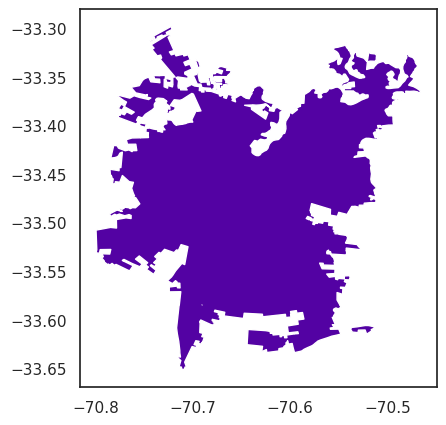

In [533]:
comuna_apps['TOPIC'] = comuna_apps.index.to_series().map(diic_topic3)
comuna_apps['TOPIC_NAME'] = comuna_apps['TOPIC'].map(topic3_name)

In [539]:
comuna_apps

PAINE empty
PAINE empty
PAINE empty
PAINE empty
PAINE empty
PAINE empty
BUIN empty
BUIN empty
BUIN empty
BUIN empty
BUIN empty
PUDAHUEL empty
PUDAHUEL empty
PUDAHUEL empty
PUDAHUEL empty
PUDAHUEL empty
COLINA empty
COLINA empty
COLINA empty
COLINA empty
COLINA empty
COLINA empty
COLINA empty
TILTIL empty
TILTIL empty
TILTIL empty
TILTIL empty
LAMPA empty
LAMPA empty
LAMPA empty
LAMPA empty
MARÍA PINTO empty
CURACAVÍ empty
CURACAVÍ empty
MARÍA PINTO empty
MARÍA PINTO empty
MARÍA PINTO empty
MARÍA PINTO empty
ISLA DE MAIPO empty
ISLA DE MAIPO empty
ISLA DE MAIPO empty
ISLA DE MAIPO empty
MAIPÚ empty
MELIPILLA empty
MELIPILLA empty
MELIPILLA empty
MELIPILLA empty
MELIPILLA empty
PEÑAFLOR empty
SAN BERNARDO empty
CALERA DE TANGO empty
SAN JOSÉ DE MAIPO empty
SAN JOSÉ DE MAIPO empty
PIRQUE empty
EL MONTE empty
TALAGANTE empty
TALAGANTE empty
TALAGANTE empty
ALHUÉ empty


(-70.88715187939994,
 -70.40838899259994,
 -33.67448880489998,
 -33.293368023099944)

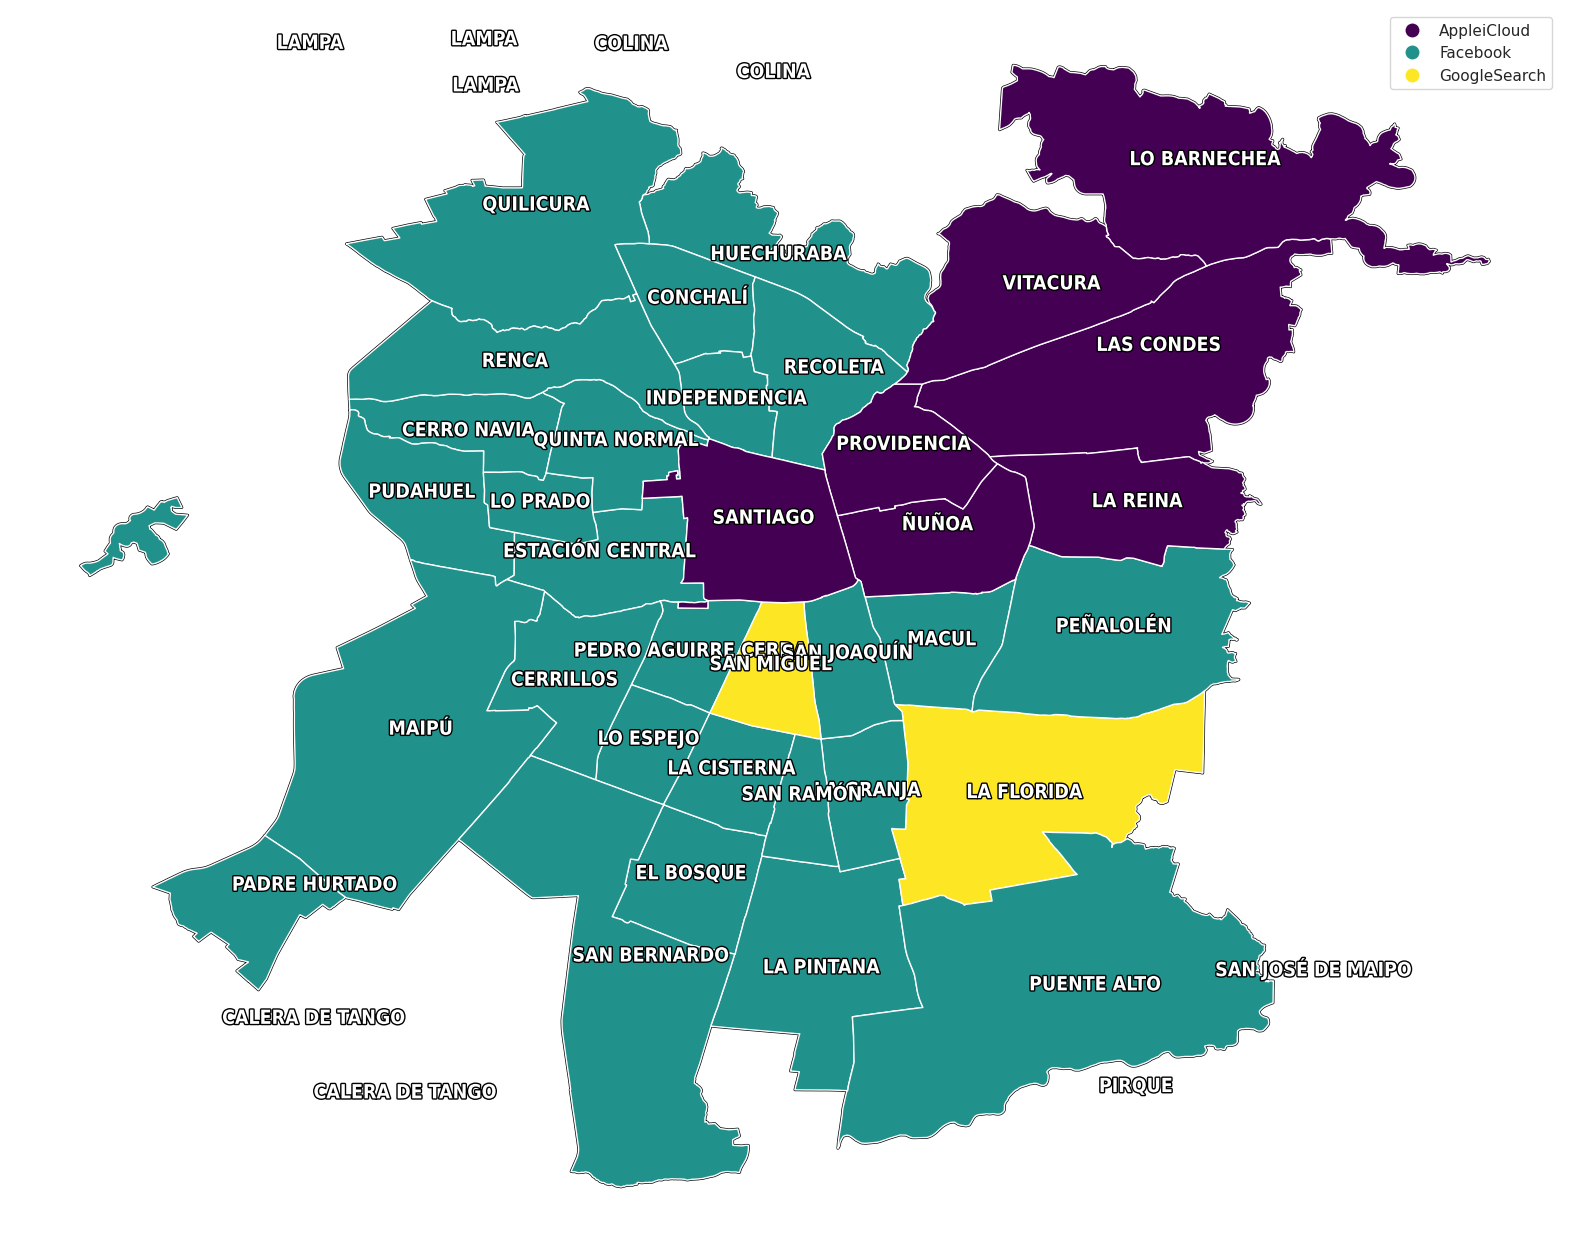

In [547]:
urban_stgo = (gpd.read_file('data/urban_areas/'#,crs={'init': 'epsg:5361'}
                           ).to_crs({'init': 'epsg:4674'})
               .pipe(lambda x: x[x.NOMBRE == 'Santiago'].copy()))
urban_stgo.plot()

In [ ]:
import shapely
import matplotlib.patheffects as path_effects

b = urban_stgo.geometry.total_bounds
box = shapely.geometry.box(*b)

# configuracion para el estilo del texto
text_style = dict(horizontalalignment='center', fontsize=14, fontweight='bold'
                 ,color='white', fontstretch='condensed')
text_effects = [path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()]

In [ ]:
ax=gransantiago.plot(figsize=(20,20), linewidth=2, edgecolor='black', facecolor='none',)
ax=comuna_apps.plot(figsize=(10,10),column='TOPIC_NAME', legend=True, cmap = 'viridis', edgecolor='white', ax=ax)

texts = []

for comuna, row in mapa_zonas.set_index('NOM_COMUNA').iterrows():
    centroid = row.geometry.intersection(box).representative_point()
    if centroid.is_empty:
        print(comuna,'empty')
        continue
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
    
#adjust_text(texts, autoalign='y', lim=10)
ax.axis('off')
#ax.set_ylim(b[1],b[3])
#ax.set_xlim(b[0],b[2])
#plt.savefig('nmf_apps.png', dpi=150, bbox_inches='tight');

### 3.5 CLUSTERING

* Intentare con un algorithmo de clustering

### por hacer:

* limpiar los datos mejor. Trabajar con el dominio (ground truth)

graph.facebook.com -> redes sociales
lithium.facebook.com -> redes sociales
pascal.facebook.com -> redes sociales

* trabajar con mas topicos
    * trabajar con mas aplicaciones por topico (10)

* identificar hotspots por aplicaciones.
    * ver grafico de heatmap, relacionar con viajes (correr aplicacion profesora Daniela.)
    
* 